#<font color = '0070FF'>Importing Libraries </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score

#<font color = '0070FF'>Loading Dataset </font>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project/MultiClass_Student_Grade/STUDENT_DATASET.csv')

In [ ]:
df.head(10)

,StudID,Year,Class,Session,Credit Hour,Course Code,Total Marks,Grade Pointer Average,Grade,Group
0,S1,2017,DDT1B,DEC,2.0,CSA,50,1.3,D+,PASS
1,S2,2018,DDT1C,DEC,1.0,CSA,54,1.3,D+,PASS
2,S3,2018,DDT1C,DEC,1.0,CSA,92,3.8,A,EXCELLENT
3,S4,2016,DDT1A,JUNE,1.0,ICS,84,3.3,B+,DISTINCTION
4,S5,2019,DDT1D,JUNE,3.0,ICS,47,1.0,D,PASS
5,S6,2019,DDT1D,JUNE,3.0,ICS,74,2.7,B-,PASS
6,S7,2017,DDT1B,DEC,1.0,ICS,62,2.0,C,PASS
7,S8,2016,DDT1A,DEC,2.0,ICS,64,2.0,C,PASS
8,S9,2018,DDT1C,DEC,2.0,ICS,57,1.7,C-,PASS
9,S10,2017,DDT1B,DEC,1.0,CSA,66,2.3,C+,PASS


In [ ]:
len(df)

1282

#<font color = '0070FF'> Preprocessing The Data </font>

In [ ]:
df.isnull().sum()

StudID                   0
Year                     0
Class                    0
Session                  0
Credit Hour              7
Course Code              6
Total Marks              0
Grade Pointer Average    0
Grade                    0
Group                    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = 'most_frequent')
imputer = imputer.fit(df[['Course Code']])
df['Course Code'] = imputer.transform(df[['Course Code']])

In [ ]:
df["Course Code"]

0       CSA
1       CSA
2       CSA
3       ICS
4       ICS
       ... 
1277    CSA
1278    ICS
1279    CSA
1280    CSA
1281    ICS
Name: Course Code, Length: 1282, dtype: object

In [ ]:
df["Group"].unique()

array(['PASS', 'EXCELLENT', 'DISTINCTION', 'EXCEPTIONAL', 'FAIL'],
      dtype=object)

Text(0, 0.5, 'Number of Students')

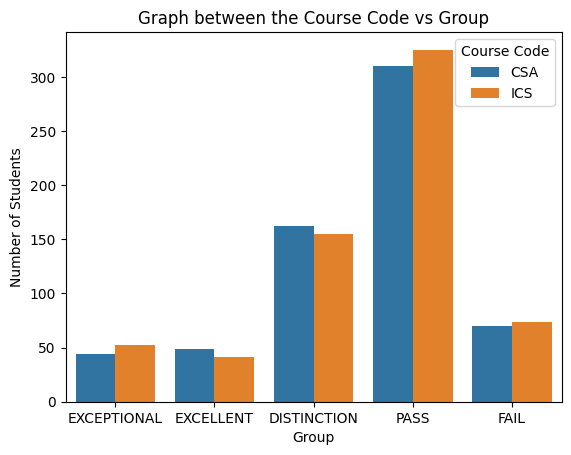

In [ ]:
ordergroup = ["EXCEPTIONAL","EXCELLENT","DISTINCTION","PASS","FAIL"]
sns.countplot(x='Group',hue='Course Code',data=df, order = ordergroup)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Graph between the Course Code vs Group")
plt.ylabel("Number of Students")

Text(0, 0.5, 'Number of Students')

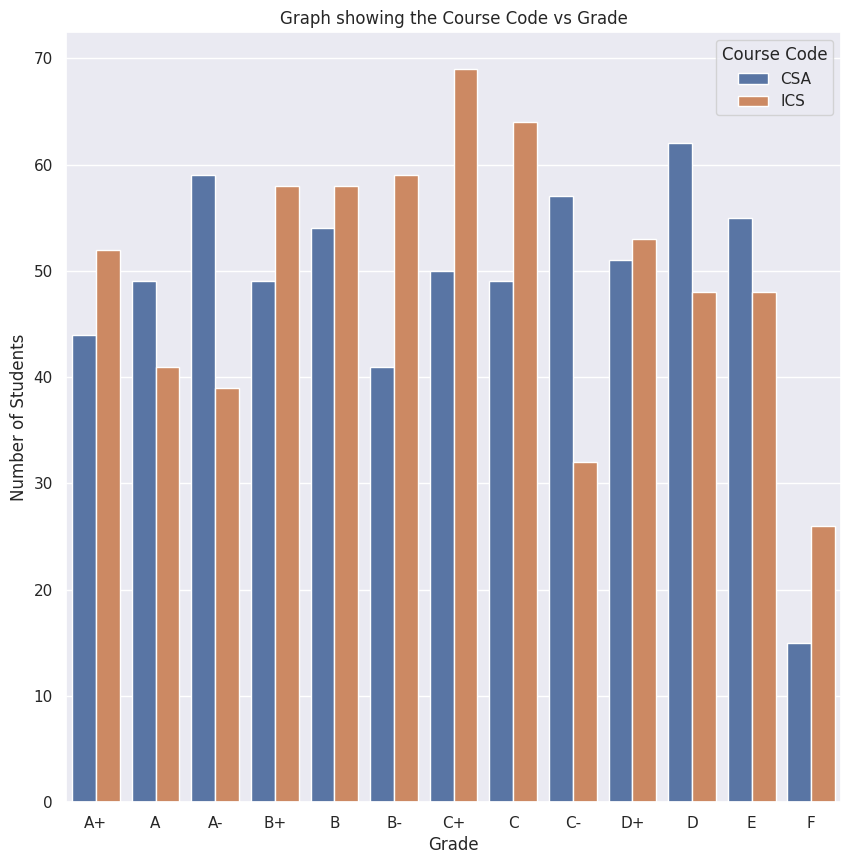

In [ ]:
ordergrade = ["A+","A","A-","B+","B","B-","C+","C","C-","D+","D","E","F"]

sns.countplot(x='Grade',hue='Course Code',data=df, order = ordergrade)

sns.set(rc={'figure.figsize':(10,10)})
plt.title("Graph showing the Course Code vs Grade")
plt.ylabel("Number of Students")

In [ ]:
label_encoder_X = LabelEncoder()
df["Course Code"] = label_encoder_X.fit_transform(df["Course Code"])

CSA -> 0 <br> ICS -> 1

In [ ]:
df["Session"] = label_encoder_X.fit_transform(df["Session"])

In [ ]:
df["Session"]

0       0
1       0
2       0
3       1
4       1
       ..
1277    1
1278    0
1279    1
1280    0
1281    1
Name: Session, Length: 1282, dtype: int64

0 -> DEC <br> 1-> JUNE

In [ ]:
df["Class"] = label_encoder_X.fit_transform(df["Class"])

In [ ]:
df["Class"]

0       1
1       2
2       2
3       0
4       3
       ..
1277    0
1278    2
1279    0
1280    2
1281    1
Name: Class, Length: 1282, dtype: int64

DDT1A -> 0 <br>
DDT1B -> 1 <br>
DDT1C -> 2 <br>
DDT1D -> 3

In [ ]:
df["Grade"]

0       D+
1       D+
2        A
3       B+
4        D
        ..
1277     C
1278     B
1279    C+
1280    D+
1281     B
Name: Grade, Length: 1282, dtype: object

In [ ]:
df['Grade'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','E','F'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)


In [ ]:
df.isnull().sum()

StudID                   0
Year                     0
Class                    0
Session                  0
Credit Hour              7
Course Code              0
Total Marks              0
Grade Pointer Average    0
Grade                    0
Group                    0
dtype: int64

In [ ]:
df.describe()

,Year,Class,Session,Credit Hour,Course Code,Total Marks,Grade Pointer Average,Grade
count,1282.000000,1282.000000,1282.000000,1275.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,2017.480499,1.480499,0.475039,2.000784,0.504680,68.064743,2.296334,5.797972
std,1.122481,1.122481,0.499571,0.831578,0.500173,17.648038,1.231816,3.528481
min,2016.000000,0.000000,0.000000,1.000000,0.000000,38.000000,0.000000,0.000000
25%,2016.000000,0.000000,0.000000,1.000000,0.000000,53.000000,1.300000,3.000000
50%,2017.000000,1.000000,0.000000,2.000000,1.000000,68.000000,2.300000,6.000000
75%,2018.000000,2.000000,1.000000,3.000000,1.000000,83.000000,3.300000,9.000000
max,2019.000000,3.000000,1.000000,3.000000,1.000000,99.000000,4.000000,12.000000


In [ ]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = 'most_frequent')
imputer = imputer.fit(df[['Credit Hour']])
df['Credit Hour'] = imputer.transform(df[['Credit Hour']])

In [ ]:
df

,StudID,Year,Class,Session,Credit Hour,Course Code,Total Marks,Grade Pointer Average,Grade,Group
0,S1,2017,1,0,2.0,0,50,1.3,9,PASS
1,S2,2018,2,0,1.0,0,54,1.3,9,PASS
2,S3,2018,2,0,1.0,0,92,3.8,1,EXCELLENT
3,S4,2016,0,1,1.0,1,84,3.3,3,DISTINCTION
4,S5,2019,3,1,3.0,1,47,1.0,10,PASS
...,...,...,...,...,...,...,...,...,...,...
1277,S1278,2016,0,1,3.0,0,61,2.0,7,PASS
1278,S1279,2018,2,0,1.0,1,76,3.0,4,DISTINCTION
1279,S1280,2016,0,1,3.0,0,68,2.3,6,PASS
1280,S1281,2018,2,0,1.0,0,52,1.3,9,PASS


In [ ]:
df.Group.replace(['FAIL','PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'],
                        [0, 1, 2, 3, 4], inplace=True)

In [ ]:
df.Group

0       1
1       1
2       3
3       2
4       1
       ..
1277    1
1278    2
1279    1
1280    1
1281    2
Name: Group, Length: 1282, dtype: int64

In [ ]:
df.isnull().sum()

StudID                   0
Year                     0
Class                    0
Session                  0
Credit Hour              0
Course Code              0
Total Marks              0
Grade Pointer Average    0
Grade                    0
Group                    0
dtype: int64

#<font color = '0070FF'>Split into X and y</font>

In [ ]:
X = df.iloc[:, 1:9]

In [ ]:
X

,Year,Class,Session,Credit Hour,Course Code,Total Marks,Grade Pointer Average,Grade
0,2017,1,0,2.0,0,50,1.3,9
1,2018,2,0,1.0,0,54,1.3,9
2,2018,2,0,1.0,0,92,3.8,1
3,2016,0,1,1.0,1,84,3.3,3
4,2019,3,1,3.0,1,47,1.0,10
...,...,...,...,...,...,...,...,...
1277,2016,0,1,3.0,0,61,2.0,7
1278,2018,2,0,1.0,1,76,3.0,4
1279,2016,0,1,3.0,0,68,2.3,6
1280,2018,2,0,1.0,0,52,1.3,9


In [ ]:
y = df.iloc[:, -1]

In [ ]:
y.values

array([1, 1, 3, ..., 1, 1, 2])

#<font color = '0070FF'>10 _ Fold Cross Validation</font>

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 

In [ ]:
def class_report(model, _X, _y, cv =10):
  k = 10
  kf = KFold(n_splits=k, random_state=None)
  results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               return_train_score=True)
  acc_score = []
  pre_score = []
  rec_score = []
    
  for training_index, testing_index in kf.split(X):  
    X_train, X_test = X.iloc[training_index,:], X.iloc[testing_index,:]  
    y_train, y_test = y.iloc[training_index] , y.iloc[testing_index]  
      
    # Fitting training data to the model  
    model.fit(X_train,y_train)  
      
    # Predicting values for the testing dataset  
    y_pred = model.predict(X_test)  
      
    # Calculatinf accuracy score using in-built sklearn accuracy_score method   
    acc = accuracy_score(y_pred , y_test)  
    acc_score.append(acc)  

    pre = precision_score(y_test, y_pred, average = 'weighted',labels=np.unique(y_pred))     
    pre_score.append(pre)

    rec = recall_score(y_test, y_pred, average = 'weighted', labels=np.unique(y_pred))     
    rec_score.append(rec)

      
  avg_acc_score = sum(acc_score)/k
  avg_pre_score = sum(pre_score)/k
  avg_rec_score = sum(rec_score)/k

  avg_f_score = (2 * avg_pre_score * avg_rec_score)/(avg_pre_score + avg_rec_score)
  
 
  return {
      'Average Accuracy : {}'.format(avg_acc_score),
      'Average Precision : {}'.format(avg_pre_score),
      'Average Recall : {}'.format(avg_rec_score),
      'Average F1- Score : {}'.format(avg_f_score)
  }
          

#<font color = '0070FF'> Training and Testing the model</font>

##Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 50)

In [ ]:
len(X_train)

1153

In [ ]:
len(y_test)

129

## <font color = '84E727'> Decision Trees </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree_model = DecisionTreeClassifier(splitter = 'random', random_state = 49, min_weight_fraction_leaf= 0.1)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.1, random_state=49,
                       splitter='random')

In [ ]:
y_pred_j48 = decision_tree_model.predict(X_test)
print(y_pred_j48)

[0 0 1 2 4 1 0 2 1 1 1 4 1 1 4 2 4 1 4 4 1 1 1 1 1 2 2 2 1 2 0 2 1 4 0 0 1
 2 2 2 0 1 1 0 2 1 0 4 1 1 1 4 4 2 2 4 2 4 1 1 2 4 4 4 1 4 4 1 4 4 2 0 1 2
 2 1 4 1 1 1 1 2 1 2 1 2 1 4 2 2 1 0 0 1 1 0 1 4 2 2 1 2 1 1 2 4 2 0 4 2 1
 1 1 4 1 2 2 4 1 1 1 1 1 1 2 2 2 4 1]


###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_j48 = confusion_matrix(y_test, y_pred_j48)
print(cf_matrix_j48)

[[14  0  0  0  0]
 [ 0 53  8  0  0]
 [ 0  0 27  0  5]
 [ 0  0  0  0 11]
 [ 0  0  0  0 11]]


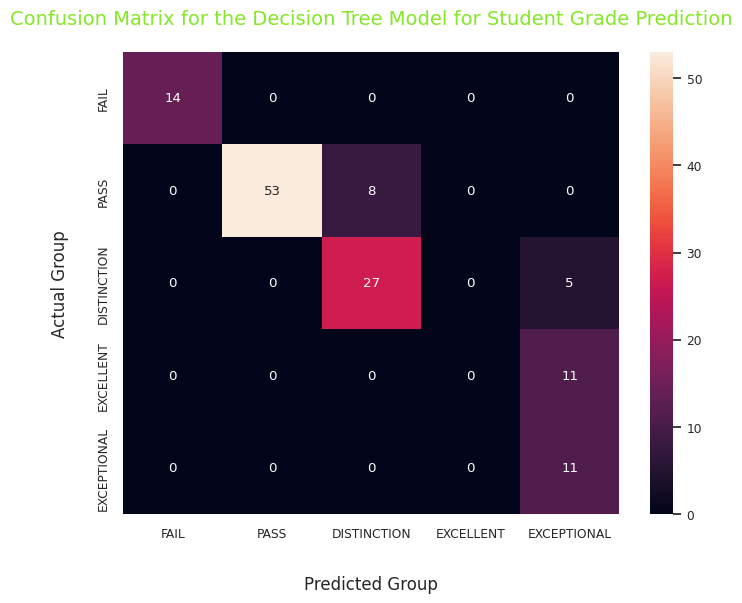

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_j48, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Decision Tree Model for Student Grade Prediction", color = '#84E727', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
class_report(decision_tree_model, X, y, 10)

{'Average Accuracy : 0.850266472868217',
 'Average F1- Score : 0.9245370916175548',
 'Average Precision : 0.9198329374775861',
 'Average Recall : 0.9292896084941689'}

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_j48))

Accuracy Score :  0.813953488372093


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_j48,average='weighted',labels=np.unique(y_pred_j48)))

Precision Score :  0.8827728454847099


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_j48,average='macro',labels=np.unique(y_pred_j48)))

Recall Score :  0.9281506147540983


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_j48,average='weighted',labels=np.unique(y_pred_j48)))

F1 Score :  0.8718539328336018


##<font color = 'orange'>Naive - Bayes</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
naive_bayesian_model = MultinomialNB(class_prior=[5,4,2,3,1])
naive_bayesian_model.fit(X_train,y_train)
y_pred_nb = naive_bayesian_model.predict(X_test)


In [ ]:
y_pred_nb

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 3, 3, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 3, 4, 2, 2, 3, 2, 3, 1, 1, 2, 3, 3, 3, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(cf_matrix_nb)

[[14  0  0  0  0]
 [ 0 57  4  0  0]
 [ 0  0 25  7  0]
 [ 0  0  0 11  0]
 [ 0  0  0  8  3]]


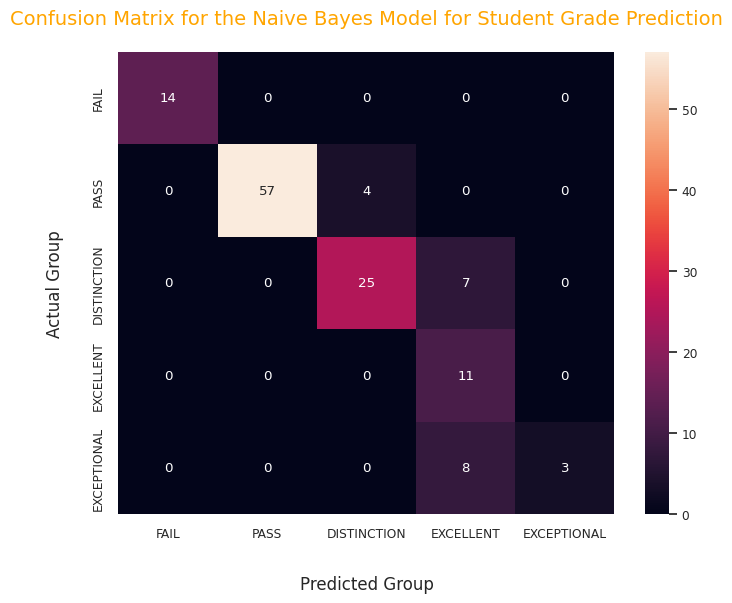

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_nb, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Naive Bayes Model for Student Grade Prediction", color = 'Orange', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
class_report(naive_bayesian_model, X, y, 10)

{'Average Accuracy : 0.8503209786821706',
 'Average F1- Score : 0.882445466314299',
 'Average Precision : 0.917092533099272',
 'Average Recall : 0.8503209786821706'}

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_nb))

Accuracy Score :  0.8527131782945736


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_nb,average='weighted',labels=np.unique(y_pred_nb)))

Precision Score :  0.9165895585302161


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_nb,average='micro',labels=np.unique(y_pred_nb)))

Recall Score :  0.8527131782945736


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_nb,average='weighted',labels=np.unique(y_pred_nb)))

F1 Score :  0.8559421538091322


##<font color = 'FB03FF'>k - Nearest Neighbours</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 200) #16
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
y_pred_knn

array([0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 4, 1, 1, 1, 4, 4, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 4, 1, 4,
       2, 1, 4, 3, 1, 0, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(cf_matrix_knn)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  5  1  5]
 [ 0  0  0  0 11]]


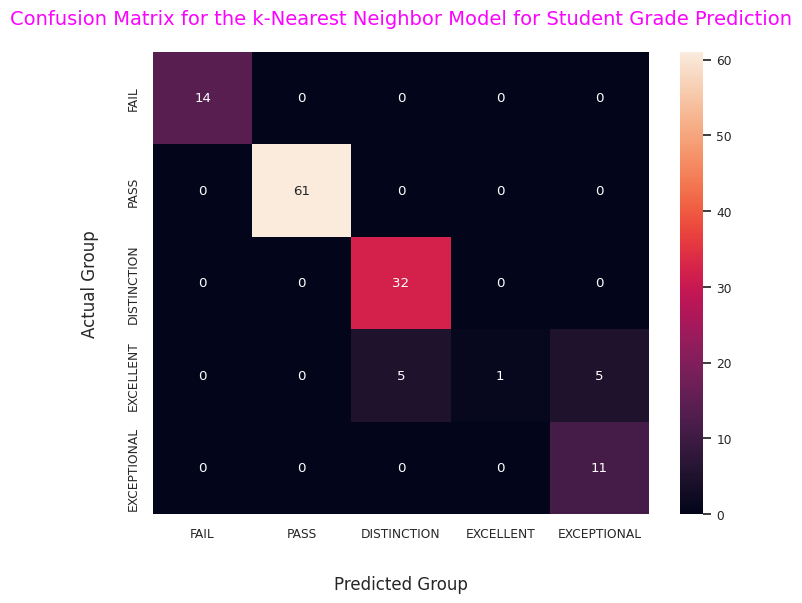

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_knn, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the k-Nearest Neighbor Model for Student Grade Prediction", color = '#FB03FF', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
class_report(knn_model, X, y, 10)

{'Average Accuracy : 0.9439437984496124',
 'Average F1- Score : 0.966051733654171',
 'Average Precision : 0.9659493051886434',
 'Average Recall : 0.9661541838448618'}

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_knn))

Accuracy Score :  0.9224806201550387


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_knn,average='macro',labels=np.unique(y_pred_knn)))

Precision Score :  0.910472972972973


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_knn,average='weighted',labels=np.unique(y_pred_knn)))

Recall Score :  0.9224806201550387


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_knn,average='micro',labels=np.unique(y_pred_knn)))

F1 Score :  0.9224806201550387


##<font color = 'aqua'>Logistic Regression </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression_model = LogisticRegression(class_weight = 'balanced',multi_class = 'multinomial', solver = 'saga', random_state = 45)
logistic_regression_model.fit(X_train,y_train)
y_pred_lr = logistic_regression_model.predict(X_test)
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix_lr)

[[14  0  0  0  0]
 [ 7 54  0  0  0]
 [ 0  7  0 25  0]
 [ 0  0  0 11  0]
 [ 0  0  0  6  5]]


In [ ]:
y_pred_lr

array([0, 0, 1, 1, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 3, 0, 3, 1, 3, 0, 0, 0, 3, 1, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 3, 4, 3, 1, 3, 3, 3, 0, 1, 3, 4, 3, 3, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 4,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 4, 3,
       0, 1, 0, 3, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 3, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix_lr)

[[14  0  0  0  0]
 [ 7 54  0  0  0]
 [ 0  7  0 25  0]
 [ 0  0  0 11  0]
 [ 0  0  0  6  5]]


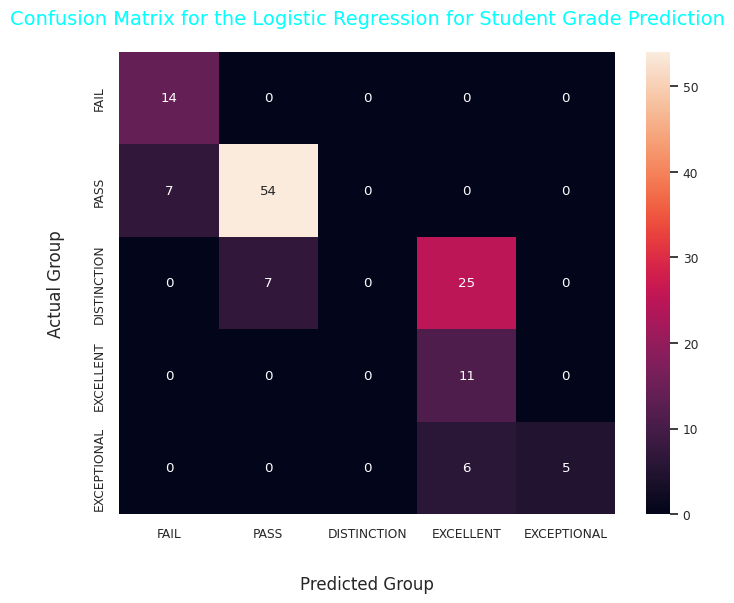

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_lr, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Logistic Regression for Student Grade Prediction", color ='aqua', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_lr))

Accuracy Score :  0.6511627906976745


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_lr,average='macro',labels=np.unique(y_pred_lr)))

Precision Score :  0.7034543325526932


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_lr,average='macro',labels=np.unique(y_pred_lr)))

Recall Score :  0.8349478390461997


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_lr,average='macro',labels=np.unique(y_pred_lr)))

F1 Score :  0.6813350603154964


##<font color = 'Olive'> Support Vector Machines </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC(kernel = 'poly', degree = 22, class_weight = 'balanced') #C = 0.4, kernel = 'poly', class_weight='balanced', degree = 1
svm_model.fit(X_train,y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
y_pred_svm

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 3, 4, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 3, 4, 2, 2, 3, 2, 3, 0, 1, 2, 4, 3, 4, 1, 3,
       3, 0, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       0, 1, 0, 3, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(cf_matrix_svm)

[[14  0  0  0  0]
 [ 9 48  4  0  0]
 [ 0  0 25  7  0]
 [ 0  0  0 11  0]
 [ 0  0  0  4  7]]


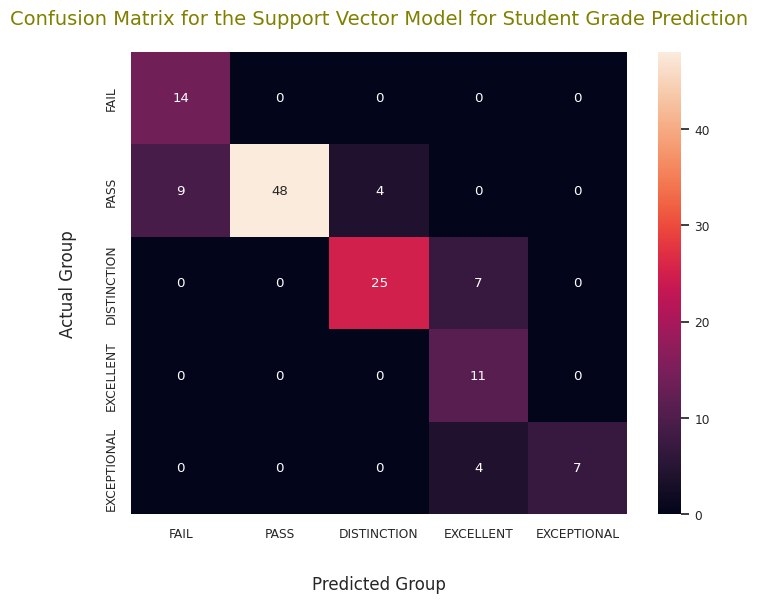

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_svm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Support Vector Model for Student Grade Prediction", color = 'Olive', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
class_report(svm_model, X, y, 10)

{'Average Accuracy : 0.7940406976744186',
 'Average F1- Score : 0.8281587934183979',
 'Average Precision : 0.8653404760440896',
 'Average Recall : 0.7940406976744186'}

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_svm))

Accuracy Score :  0.813953488372093


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_svm,average='weighted',labels=np.unique(y_pred_svm)))

Precision Score :  0.8806817521471821


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_svm,average='weighted',labels=np.unique(y_pred_svm)))

Recall Score :  0.813953488372093


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_svm,average='micro',labels=np.unique(y_pred_svm)))

F1 Score :  0.8139534883720931


# <font color='DarkBlue'> SMOTE</font>

##Splitting the data for implementing SMOTE

In [ ]:
y_train.value_counts()

1    574
2    285
0    130
4     85
3     79
Name: Group, dtype: int64

In [ ]:
X_train.shape,y_train.shape

((1153, 8), (1153,))

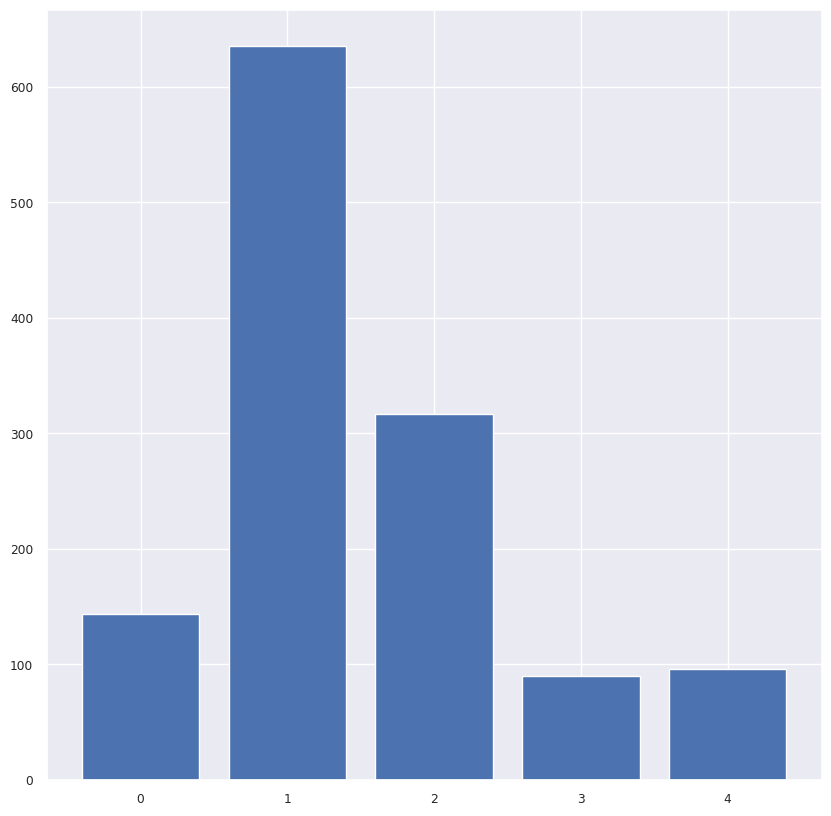

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#We have to split the SMOTE sampling into 1:1:2:2:2 ratio
#The values of the Oversampling strategy would become
#{0: 71, 1: 71, 2: 142, 3: 142, 4:142}

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 16)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())
X_train_sm.shape, y_train_sm.shape

((2870, 8), (2870,))

In [ ]:
len(y_train_sm[y_train_sm==0]),len(y_train_sm[y_train_sm==1]),len(y_train_sm[y_train_sm==2]),len(y_train_sm[y_train_sm==3]),len(y_train_sm[y_train_sm==4])

(574, 574, 574, 574, 574)

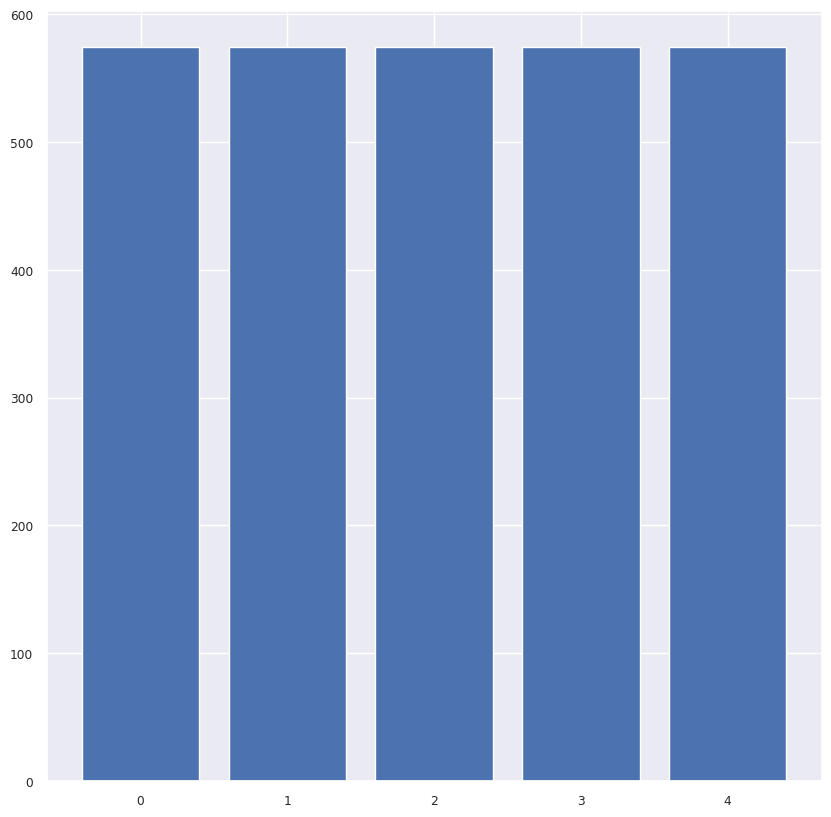

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train_sm)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from collections import Counter
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_sm))

Before SMOTE :  Counter({1: 574, 2: 285, 0: 130, 4: 85, 3: 79})
After SMOTE :  Counter({1: 574, 2: 574, 0: 574, 3: 574, 4: 574})


In [ ]:
strategy = {0:600, 1:600, 2:1200, 3:1200, 4:1200}
smote = SMOTE(sampling_strategy=strategy)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train.ravel())
X_train_smote.shape, y_train_smote.shape

((4800, 8), (4800,))

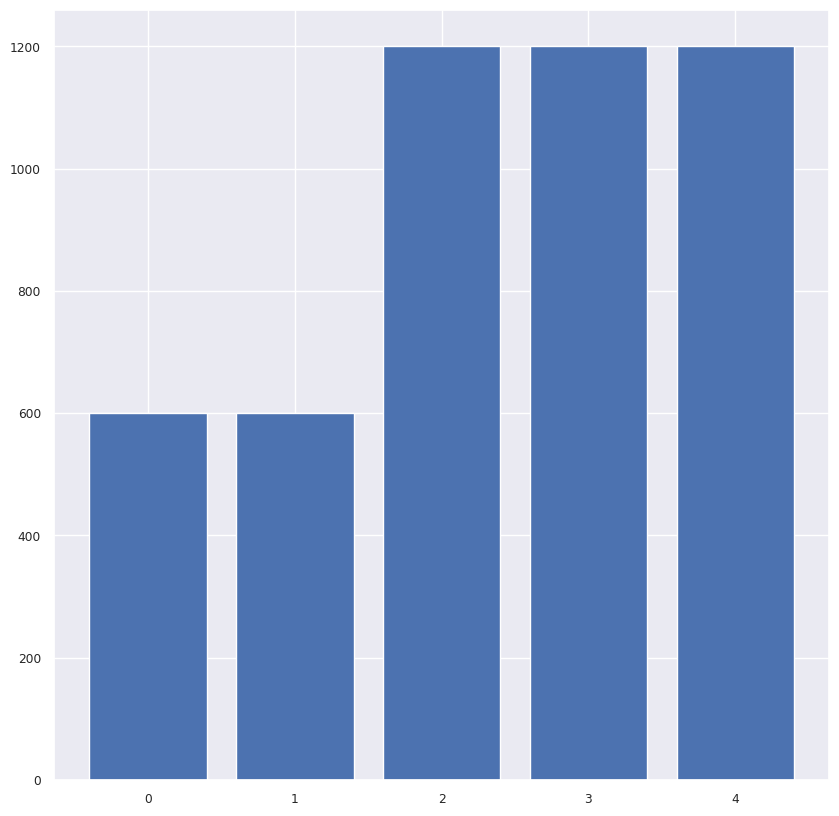

In [ ]:
counter = Counter(y_train_smote)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## <font color = '84E727'> Decision Trees </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Decision_tree_smote = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced',splitter = 'random', random_state = 8, min_weight_fraction_leaf= 0.1)
Decision_tree_smote.fit(X_train_smote, y_train_smote)
y_pred_j48_smote = Decision_tree_smote.predict(X_test)
cf_matrix_j48_sm = confusion_matrix(y_test, y_pred_j48_smote)
print(cf_matrix_j48_sm)

[[14  0  0  0  0]
 [ 0 49 12  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


In [ ]:
y_pred_j48_smote

array([0, 0, 1, 2, 3, 2, 0, 2, 2, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_j48_sm = confusion_matrix(y_test, y_pred_j48_smote)
print(cf_matrix_j48_sm)

[[14  0  0  0  0]
 [ 0 49 12  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


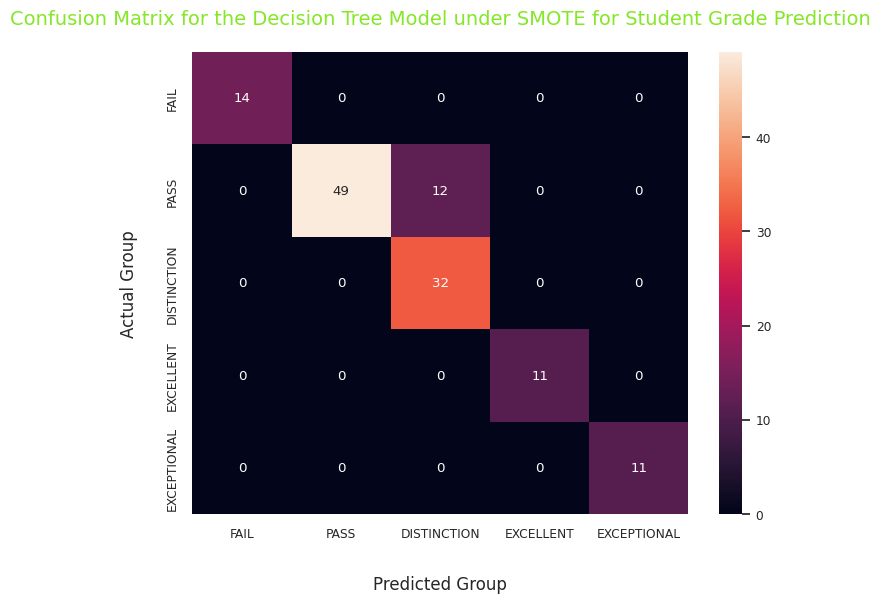

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_j48_sm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Decision Tree Model under SMOTE for Student Grade Prediction", color = '#84E727', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
class_report(Decision_tree_smote, X_train_smote, y_train_smote, 10)

{'Average Accuracy : 0.866642441860465',
 'Average F1- Score : 0.8860697580573166',
 'Average Precision : 0.906388041856563',
 'Average Recall : 0.866642441860465'}

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_j48_smote))

Accuracy Score :  0.9069767441860465


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_j48_smote,average='macro',labels=np.unique(y_pred_j48_smote)))

Precision Score :  0.9454545454545455


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_j48_smote,average='macro',labels=np.unique(y_pred_j48_smote)))

Recall Score :  0.960655737704918


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_j48_smote,average='macro',labels=np.unique(y_pred_j48_smote)))

F1 Score :  0.9466028708133972


##<font color = 'orange'>Naive - Bayes</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
naive_bayesian_model_smote = MultinomialNB(class_prior=[1,5,3,4,2]) #
naive_bayesian_model_smote.fit(X_train_smote,y_train_smote)
y_pred_nb_smote = naive_bayesian_model_smote.predict(X_test)

In [ ]:
y_pred_nb

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 3, 3, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 3, 4, 2, 2, 3, 2, 3, 1, 1, 2, 3, 3, 3, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_nb_smote = confusion_matrix(y_test, y_pred_nb_smote)
print(cf_matrix_nb_smote)

[[14  0  0  0  0]
 [ 0 57  4  0  0]
 [ 0  0 25  7  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


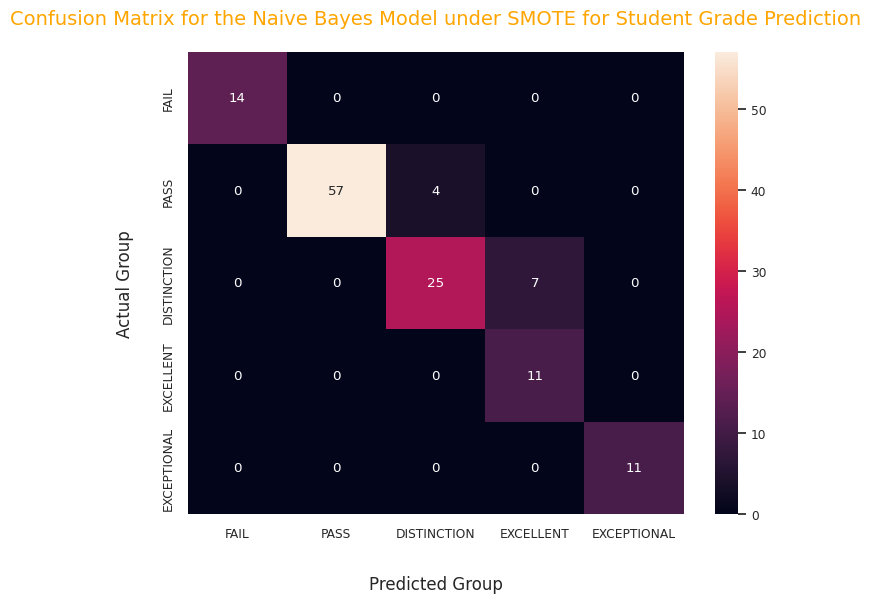

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_nb_smote, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Naive Bayes Model under SMOTE for Student Grade Prediction", color = 'Orange', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
class_report(naive_bayesian_model_smote, X, y, 10)

{'Average Accuracy : 0.8978561046511627',
 'Average F1- Score : 0.911897801737332',
 'Average Precision : 0.9263856767888573',
 'Average Recall : 0.8978561046511627'}

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_nb_smote))

Accuracy Score :  0.9147286821705426


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_nb_smote,average='weighted',labels=np.unique(y_pred_nb_smote)))

Precision Score :  0.9326234815408833


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_nb_smote,average='weighted',labels=np.unique(y_pred_nb_smote)))

Recall Score :  0.9147286821705426


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_nb_smote,average='weighted',labels=np.unique(y_pred_nb_smote)))

F1 Score :  0.9186553424244862


##<font color = 'FB03FF'>k - Nearest Neighbours</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model_smote = KNeighborsClassifier(n_neighbors = 140)
knn_model_smote.fit(X_train_smote,y_train_smote)
y_pred_knn_smote = knn_model_smote.predict(X_test)

In [ ]:
y_pred_knn

array([0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 4, 1, 1, 1, 4, 4, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 4, 1, 4,
       2, 1, 4, 3, 1, 0, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)
print(cf_matrix_knn_smote)

[[14  0  0  0  0]
 [ 4 54  3  0  0]
 [ 0  0 31  1  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


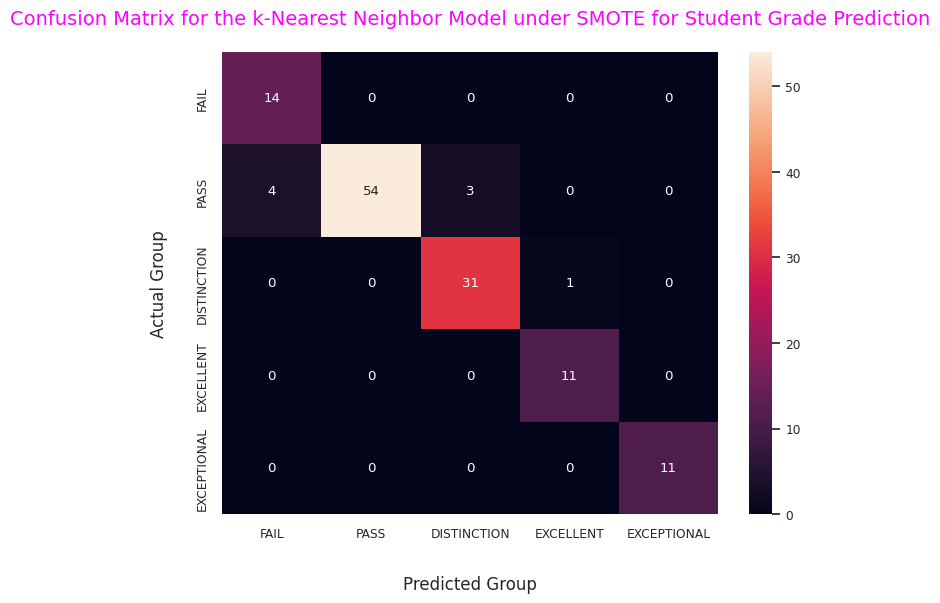

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_knn_smote, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the k-Nearest Neighbor Model under SMOTE for Student Grade Prediction", color = '#FB03FF', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_knn_smote))

Accuracy Score :  0.937984496124031


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_knn_smote,average='weighted',labels=np.unique(y_pred_knn_smote)))

Precision Score :  0.9468890915539342


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_knn_smote,average='macro',labels=np.unique(y_pred_knn_smote)))

Recall Score :  0.9707991803278688


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_knn_smote,average='macro',labels=np.unique(y_pred_knn_smote)))

F1 Score :  0.9420092226613965


##<font color = 'aqua'>Logistic Regression </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model_smote = LogisticRegression(solver='liblinear')
logistic_model_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = logistic_model_smote.predict(X_test)

In [ ]:
y_pred_lr_smote

array([0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_lr_sm = confusion_matrix(y_test, y_pred_lr_smote)
print(cf_matrix_lr_sm)

[[14  0  0  0  0]
 [ 0 53  8  0  0]
 [ 0  0 32  0  0]
 [ 0  0  1 10  0]
 [ 0  0  0  0 11]]


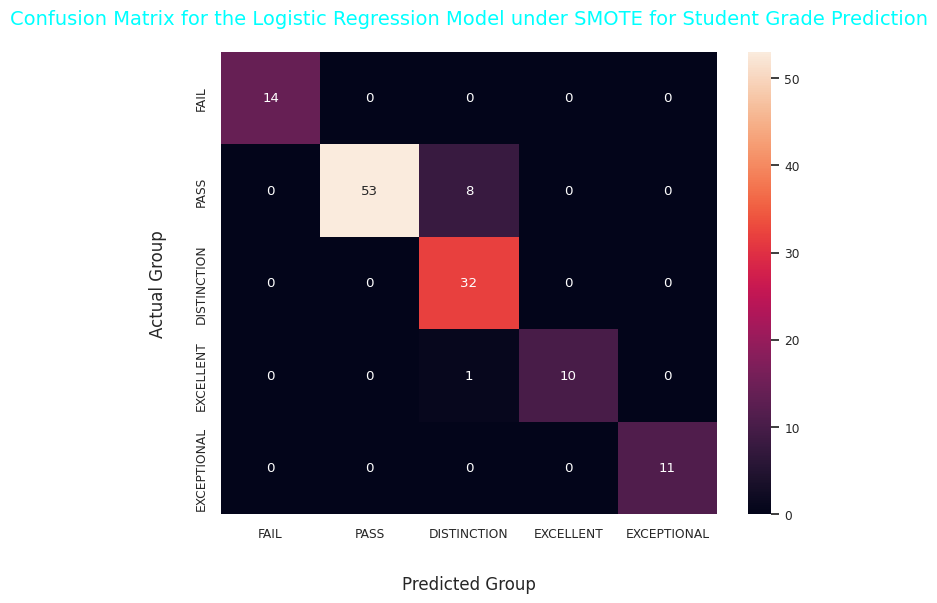

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_lr_sm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Logistic Regression Model under SMOTE for Student Grade Prediction", color = 'aqua', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
class_report(logistic_model_smote, X, y, 10)

{'Average Accuracy : 0.9048207364341085',
 'Average F1- Score : 0.9416589424662283',
 'Average Precision : 0.9119292845397904',
 'Average Recall : 0.9733923476937527'}

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_lr_smote))

Accuracy Score :  0.9302325581395349


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_lr_smote,average='weighted',labels=np.unique(y_pred_lr_smote)))

Precision Score :  0.9455473624503686


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_lr_smote,average='macro',labels=np.unique(y_pred_lr_smote)))

Recall Score :  0.9555886736214605


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_lr_smote,average='weighted',labels=np.unique(y_pred_lr_smote)))

F1 Score :  0.9321727383128097


##<font color = 'Olive'> Support Vector Machines </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn import svm

In [ ]:
svm_model_smote = svm.SVC(kernel = 'poly', degree = 22, class_weight = 'balanced', random_state = 30) #C = 0.3, kernel = 'poly', class_weight='balanced', degree = 2, random_state = 10
svm_model_smote.fit(X_train_smote,y_train_smote)
y_pred_svm_smote = svm_model_smote.predict(X_test)

In [ ]:
y_pred_svm_smote

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 3, 4, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 0, 1, 2, 4, 3, 4, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       0, 1, 0, 3, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_svm_smote = confusion_matrix(y_test, y_pred_svm_smote)
print(cf_matrix_svm_smote)

[[14  0  0  0  0]
 [ 7 50  4  0  0]
 [ 0  0 25  7  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


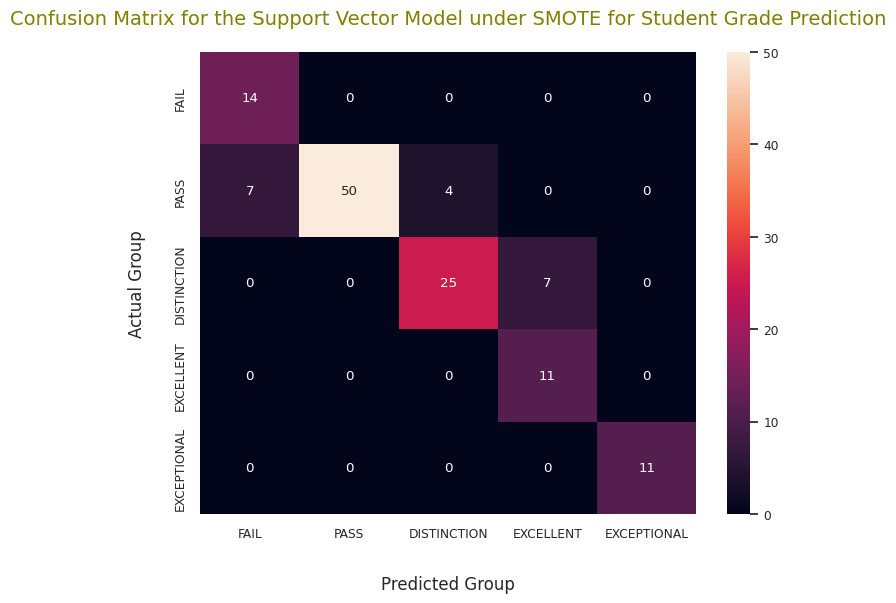

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_svm_smote, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Support Vector Model under SMOTE for Student Grade Prediction", color = 'Olive', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
class_report(svm_model_smote, X, y, 10)

{'Average Accuracy : 0.7940406976744186',
 'Average F1- Score : 0.8281587934183979',
 'Average Precision : 0.8653404760440896',
 'Average Recall : 0.7940406976744186'}

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred_svm_smote))

Accuracy Score :  0.8604651162790697


In [ ]:
print("Precision Score : ", precision_score(y_test, y_pred_svm_smote,average='weighted',labels=np.unique(y_pred_svm_smote)))

Precision Score :  0.8964477709465681


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred_svm_smote,average='macro',labels=np.unique(y_pred_svm_smote)))

Recall Score :  0.9201844262295082


In [ ]:
print("F1 Score : ", f1_score(y_test, y_pred_svm_smote,average='macro',labels=np.unique(y_pred_svm_smote)))

F1 Score :  0.8558387443407229


# <font color = "60063B"> WrapperSubsetEval - Feature Selection 1 (FS - 1) </font>

##Selecting Features

In [ ]:
df_copy = df.copy()

from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df_copy['StudID']= label_encoder.fit_transform(df['StudID'])
  
df_copy['StudID'].unique()

array([  0, 394, 505, ..., 313, 314, 315])

In [ ]:
df_copy.dtypes

StudID                     int64
Year                       int64
Class                      int64
Session                    int64
Credit Hour              float64
Course Code                int64
Total Marks                int64
Grade Pointer Average    float64
Grade                      int64
Group                      int64
dtype: object

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def wrapper_subset_eval(df, y_col, n_features_to_select, classifier):
    """
    Implements WrapperSubsetEval for feature selection using pandas DataFrame.

    Parameters:
    -----------
    df : pandas DataFrame
        The input feature matrix as a DataFrame.
    y_col : str
        The column name of the target variable in the DataFrame.
    n_features_to_select : int
        The number of features to select.
    classifier : object
        The classifier object to use for training and evaluation.

    Returns:
    --------
    best_features : list
        The list of column names of the best features selected.
    """
    # Separate the features (X) and target (y) from the DataFrame
    X_fs1 = df.drop(columns=['Group'])
    y_fs1 = df['Group']

    # Initialize the best features list
    best_features = []

    # Loop until the desired number of features is selected
    while len(best_features) < n_features_to_select:
        best_score = -float('inf')
        best_feature = None

        # Loop over all remaining features
        for feature in X.columns:
            # Skip features that are already selected
            if feature in best_features:
                continue

            # Try adding the current feature to the selected features
            features_to_try = best_features + [feature]
            X_subset = X_fs1[features_to_try]

            # Split the data into training and test sets
            X_train_fs1, X_test_fs1, y_train_fs1, y_test_fs1 = train_test_split(X_subset, y_fs1, test_size=0.2, random_state=42)

            # Train the classifier and evaluate its performance
            clf = classifier.fit(X_train_fs1, y_train_fs1)
            y_pred_fs1 = clf.predict(X_test_fs1)
            score = accuracy_score(y_test_fs1, y_pred_fs1)

            # Update the best score and feature if necessary
            if score > best_score:
                best_score = score
                best_feature = feature

        # Add the best feature to the selected features list
        best_features.append(best_feature)

    return best_features


In [ ]:
# Decision Tree

clf1 = DecisionTreeClassifier()
# Call the wrapper_subset_eval function
best_features_j48 = wrapper_subset_eval(df_copy, y_col='Group', n_features_to_select=3, classifier=clf1)

#----------------------------------------------------------------------------------------------------------#
 
# Naive Bayes

clf2 = MultinomialNB()
# Call the wrapper_subset_eval function
best_features_nb = wrapper_subset_eval(df_copy, y_col='Group', n_features_to_select=3, classifier=clf2)

#----------------------------------------------------------------------------------------------------------#

# K Nearest Neighbor

clf3 = KNeighborsClassifier()
# Call the wrapper_subset_eval function
best_features_knn = wrapper_subset_eval(df_copy, y_col='Group', n_features_to_select=3, classifier=clf3)

#----------------------------------------------------------------------------------------------------------#

# Logistic Regression

clf4 = LogisticRegression()
# Call the wrapper_subset_eval function
best_features_lr = wrapper_subset_eval(df_copy, y_col='Group', n_features_to_select=3, classifier=clf4)

#----------------------------------------------------------------------------------------------------------#

# Support Vector Machines

clf5 = svm.SVC()
# Call the wrapper_subset_eval function
best_features_svm = wrapper_subset_eval(df_copy, y_col='Group', n_features_to_select=3, classifier=clf5)

#---------------------------------------------------------------------------------------------------------#

# Printing the Best eatures  List

combined_list = best_features_nb + best_features_j48 + best_features_svm + best_features_knn + best_features_lr\
# Use set to get unique items
best_features = set(combined_list)

# Print the unique items
print(best_features)

{'Total Marks', 'Year', 'Class', 'Session', 'Grade', 'Grade Pointer Average'}


##Splitting into Training and Testing

In [ ]:
X_fs1 = df_copy.loc[: , ['Session', 'Grade', 'Grade Pointer Average', 'Total Marks', 'Year', 'Class']]
y_fs1 = df_copy.iloc[: , -1]

In [ ]:
X_fs1.head()

,Session,Grade,Grade Pointer Average,Total Marks,Year,Class
0,0,9,1.3,50,2017,1
1,0,9,1.3,54,2018,2
2,0,1,3.8,92,2018,2
3,1,3,3.3,84,2016,0
4,1,10,1.0,47,2019,3


In [ ]:
y_fs1.head()

0    1
1    1
2    3
3    2
4    1
Name: Group, dtype: int64

In [ ]:
X_train_fs1, X_test_fs1, y_train_fs1, y_test_fs1 = train_test_split(X_fs1, y_fs1, test_size = 0.1, random_state = 50)

In [ ]:
len(X_train_fs1)

1153

In [ ]:
len(y_test_fs1)

129

## <font color = '84E727'> Decision Trees </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree_model_fs1 = DecisionTreeClassifier(splitter = 'random', random_state = 20, min_weight_fraction_leaf= 0.1)
decision_tree_model_fs1.fit(X_train_fs1, y_train_fs1)

DecisionTreeClassifier(min_weight_fraction_leaf=0.1, random_state=20,
                       splitter='random')

In [ ]:
y_pred_j48_fs1 = decision_tree_model_fs1.predict(X_test_fs1)
print(y_pred_j48_fs1)

[0 0 1 2 4 1 0 1 1 1 1 4 1 1 4 2 4 1 2 4 1 1 1 1 1 2 2 2 1 2 0 2 1 2 0 0 1
 2 2 1 0 1 1 0 2 1 0 4 1 1 1 4 4 2 1 4 2 4 1 1 2 4 4 4 1 4 2 1 4 4 1 0 1 1
 2 1 4 1 1 1 1 1 1 2 1 1 1 4 1 1 1 0 0 1 1 0 1 4 2 2 1 2 1 1 2 4 1 0 4 2 1
 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 4 1]


###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_j48_fs1 = confusion_matrix(y_test_fs1, y_pred_j48_fs1)
print(cf_matrix_j48_fs1)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  5 27  0  0]
 [ 0  0  0  0 11]
 [ 0  0  0  0 11]]


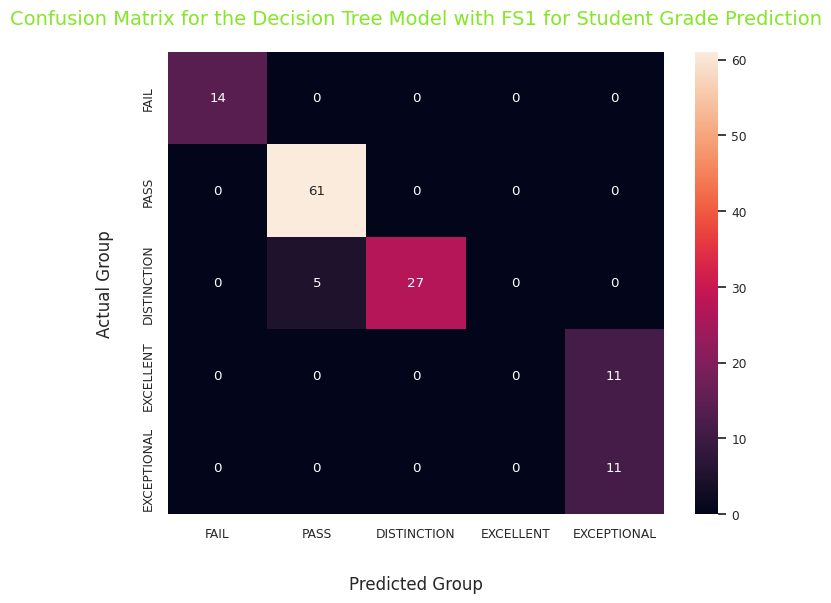

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_j48_fs1, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Decision Tree Model with FS1 for Student Grade Prediction", color = '#84E727', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_j48_fs1))

Accuracy Score :  0.875968992248062


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_j48_fs1,average='weighted',labels=np.unique(y_pred_j48_fs1)))

Precision Score :  0.9142270159219311


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_j48_fs1,average='weighted',labels=np.unique(y_pred_j48_fs1)))

Recall Score :  0.9576271186440678


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_j48_fs1,average='weighted',labels=np.unique(y_pred_j48_fs1)))

F1 Score :  0.9255923230796955


##<font color = 'orange'>Naive - Bayes</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
naive_bayesian_model_fs1 = MultinomialNB(class_prior=[5,3,4,3,1])
naive_bayesian_model_fs1.fit(X_train_fs1,y_train_fs1)
y_pred_nb_fs1 = naive_bayesian_model_fs1.predict(X_test_fs1)


In [ ]:
y_pred_nb_fs1

array([0, 0, 1, 2, 3, 1, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 2, 3, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 3, 4, 2, 2, 3, 2, 3, 1, 1, 2, 3, 3, 3, 1, 3,
       2, 1, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_nb_fs1 = confusion_matrix(y_test_fs1, y_pred_nb_fs1)
print(cf_matrix_nb_fs1)

[[14  0  0  0  0]
 [ 0 53  8  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  8  3]]


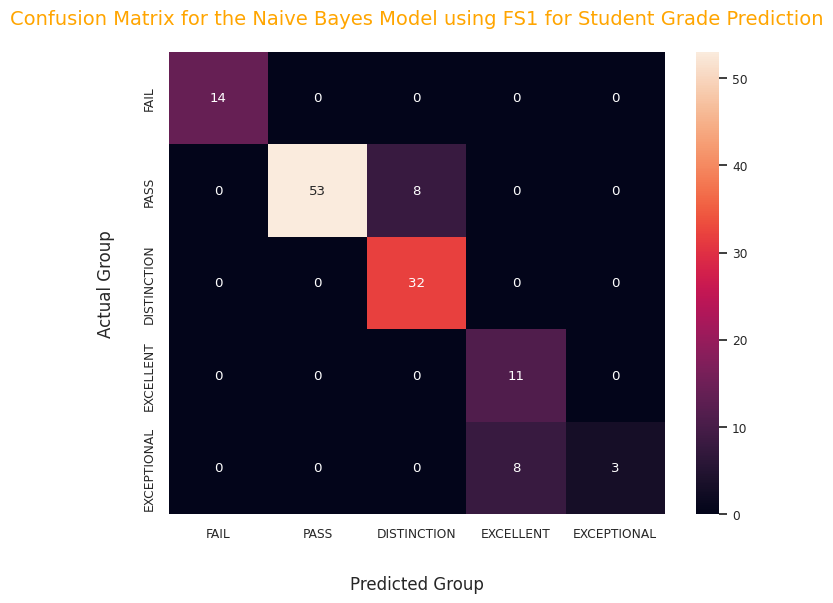

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_nb_fs1, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Naive Bayes Model using FS1 for Student Grade Prediction", color = 'Orange', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_nb_fs1))

Accuracy Score :  0.875968992248062


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_nb_fs1,average='weighted',labels=np.unique(y_pred_nb_fs1)))

Precision Score :  0.9144838841289269


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_nb_fs1,average='weighted',labels=np.unique(y_pred_nb_fs1)))

Recall Score :  0.875968992248062


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_nb_fs1,average='weighted',labels=np.unique(y_pred_nb_fs1)))

F1 Score :  0.8677883338838049


##<font color = 'FB03FF'>k - Nearest Neighbours</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model_fs1 = KNeighborsClassifier(n_neighbors = 220) #160 
knn_model_fs1.fit(X_train_fs1,y_train_fs1)
y_pred_knn_fs1 = knn_model_fs1.predict(X_test_fs1)

In [ ]:
y_pred_knn_fs1

array([0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 4, 1, 1, 1, 4, 4, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 4, 1, 4,
       2, 1, 4, 3, 1, 0, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_knn_fs1 = confusion_matrix(y_test_fs1, y_pred_knn_fs1)
print(cf_matrix_knn_fs1)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  5  1  5]
 [ 0  0  0  0 11]]


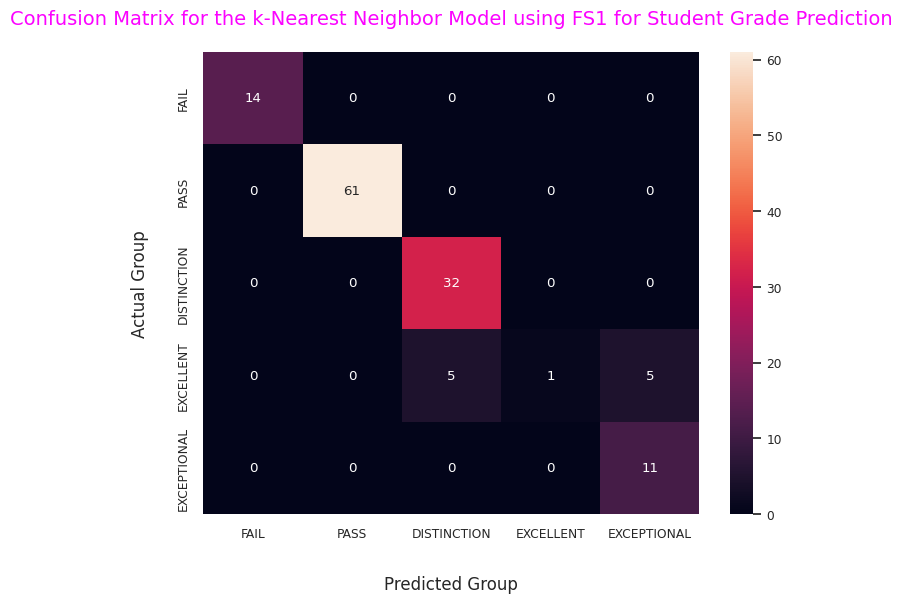

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_knn_fs1, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the k-Nearest Neighbor Model using FS1 for Student Grade Prediction", color = '#FB03FF', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_knn_fs1))

Accuracy Score :  0.9224806201550387


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_knn_fs1,average='macro',labels=np.unique(y_pred_knn_fs1)))

Precision Score :  0.910472972972973


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_knn_fs1,average='weighted',labels=np.unique(y_pred_knn_fs1)))

Recall Score :  0.9224806201550387


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_knn_fs1,average='micro',labels=np.unique(y_pred_knn_fs1)))

F1 Score :  0.9224806201550387


##<font color = 'aqua'>Logistic Regression </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression_model_fs1 = LogisticRegression( class_weight = 'balanced', multi_class = 'multinomial', solver = 'saga', random_state = 202  )#C = 0.1 , class_weight = 'balanced', multi_class = 'multinomial', solver = 'sag', random_state = 18)
logistic_regression_model_fs1.fit(X_train_fs1,y_train_fs1)
y_pred_lr_fs1 = logistic_regression_model_fs1.predict(X_test_fs1)

In [ ]:
y_pred_lr_fs1

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 0, 3, 2, 4, 1, 3, 4, 1, 0,
       1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0,
       3, 0, 0, 3, 1, 0, 1, 4, 4, 3, 1, 3, 3, 4, 0, 1, 3, 4, 3, 4, 1, 3,
       3, 0, 3, 3, 1, 0, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 4,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 4, 2, 2, 0, 3, 1, 0, 2, 3, 1, 0, 4, 3,
       0, 1, 0, 3, 0, 1, 3, 3, 0, 1, 0, 1, 0, 0, 1, 1, 2, 4, 0])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_lr_fs1 = confusion_matrix(y_test_fs1, y_pred_lr_fs1)
print(cf_matrix_lr_fs1)

[[14  0  0  0  0]
 [23 38  0  0  0]
 [ 0  5 14 13  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


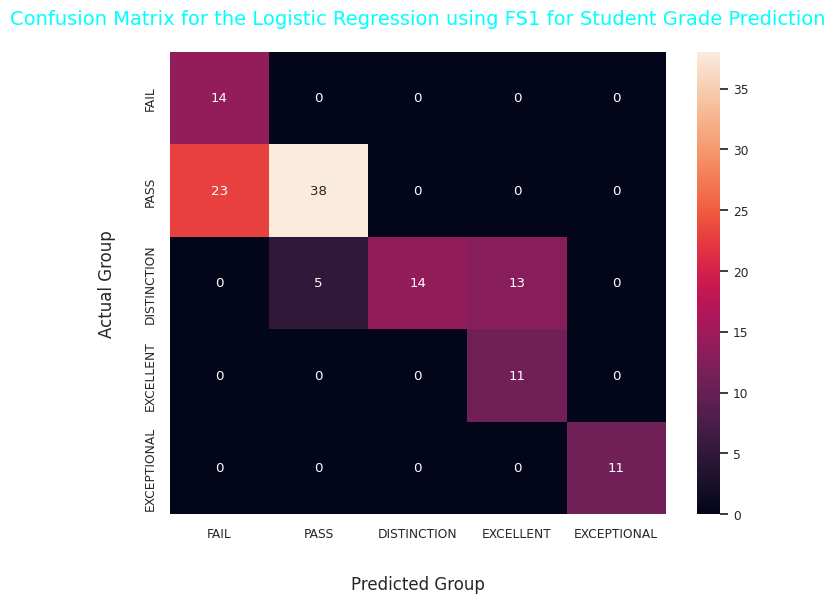

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_lr_fs1, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Logistic Regression using FS1 for Student Grade Prediction", color ='aqua', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_lr_fs1))

Accuracy Score :  0.6821705426356589


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_lr_fs1,average='macro',labels=np.unique(y_pred_lr_fs1)))

Precision Score :  0.744086528388854


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_lr_fs1,average='macro',labels=np.unique(y_pred_lr_fs1)))

Recall Score :  0.8120901639344262


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_lr_fs1,average='macro',labels=np.unique(y_pred_lr_fs1)))

F1 Score :  0.7034111838715419


##<font color = 'Olive'> Support Vector Machines </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn import svm

In [ ]:
svm_model_fs1 = svm.SVC(kernel = 'poly', degree = 22, class_weight = 'balanced') #C = 0.4, kernel = 'poly', class_weight='balanced', degree = 1
svm_model_fs1.fit(X_train_fs1,y_train_fs1)
y_pred_svm_fs1 = svm_model_fs1.predict(X_test_fs1)

In [ ]:
y_pred_svm_fs1

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 3, 4, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 0, 1, 2, 4, 3, 4, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       0, 1, 0, 3, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_svm_fs1 = confusion_matrix(y_test_fs1, y_pred_svm_fs1)
print(cf_matrix_svm_fs1)

[[14  0  0  0  0]
 [ 7 50  4  0  0]
 [ 0  0 25  7  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


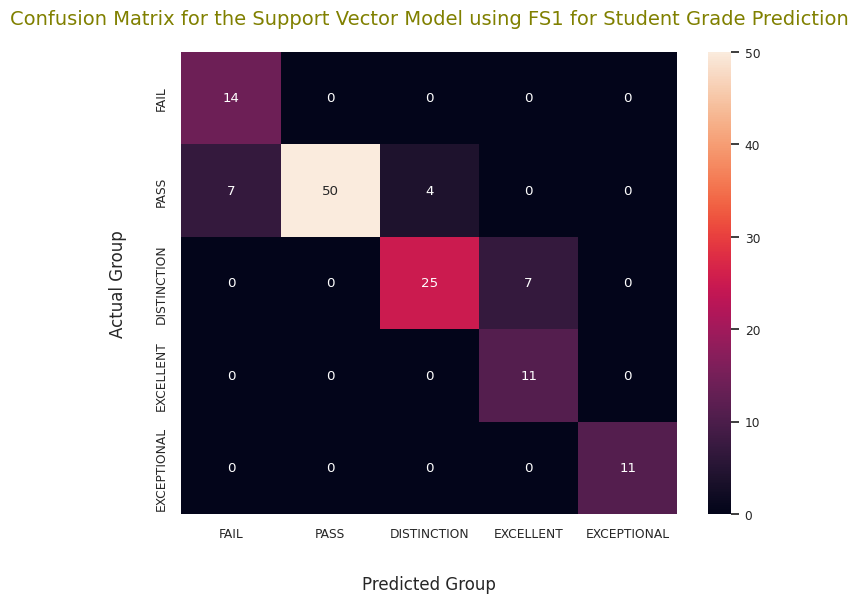

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_svm_fs1, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Support Vector Model using FS1 for Student Grade Prediction", color = 'Olive', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_svm_fs1))

Accuracy Score :  0.8604651162790697


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_svm_fs1,average='weighted',labels=np.unique(y_pred_svm_fs1)))

Precision Score :  0.8964477709465681


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_svm_fs1,average='macro',labels=np.unique(y_pred_svm_fs1)))

Recall Score :  0.9201844262295082


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_svm_fs1,average='macro',labels=np.unique(y_pred_svm_fs1)))

F1 Score :  0.8558387443407229


# <font color = "11E27F"> ClassiferSubsetEval - Feature Selection 2 (FS - 2) </font>

##Selecting Features

In [ ]:
df_copy.dtypes

StudID                     int64
Year                       int64
Class                      int64
Session                    int64
Credit Hour              float64
Course Code                int64
Total Marks                int64
Grade Pointer Average    float64
Grade                      int64
Group                      int64
dtype: object

In [ ]:
X_fs2 = df_copy.drop(columns=['Group'])
y_fs2 = df_copy['Group']

In [ ]:
X_fs2.head()

,StudID,Year,Class,Session,Credit Hour,Course Code,Total Marks,Grade Pointer Average,Grade
0,0,2017,1,0,2.0,0,50,1.3,9
1,394,2018,2,0,1.0,0,54,1.3,9
2,505,2018,2,0,1.0,0,92,3.8,1
3,616,2016,0,1,1.0,1,84,3.3,3
4,727,2019,3,1,3.0,1,47,1.0,10


In [ ]:
y_fs2.head()

0    1
1    1
2    3
3    2
4    1
Name: Group, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score

def classifier_subset_eval(X_fs2, y_fs2, n_features_to_select, classifier):
    """
    Implements a basic wrapper-based feature selection using a classifier for evaluation.

    Parameters:
    -----------
    X : pandas DataFrame or numpy array
        The input feature matrix.
    y : pandas Series or numpy array
        The target variable.
    n_features_to_select : int
        The number of features to select.
    classifier : object
        The classifier object to use for training and evaluation.

    Returns:
    --------
    best_features : list
        The list of column names of the best features selected.
    """
    # Initialize the best features list


    best_features_fs2 = []

    # Loop until the desired number of features is selected
    while len(best_features_fs2) < n_features_to_select:
        best_score = -float('inf')
        best_feature = None

        # Loop over all remaining features
        for feature in X_fs2.columns:
            # Skip features that are already selected
            if feature in best_features_fs2:
                continue

            # Try adding the current feature to the selected features
            features_to_try = best_features_fs2 + [feature]
            X_subset = X_fs2[features_to_try]

            # Train the classifier and evaluate its performance using cross-validation
            scores = cross_val_score(classifier, X_subset, y_fs2, cv=10)
            score = scores.mean()

            # Update the best score and feature if necessary
            if score > best_score:
                best_score = score
                best_feature = feature

        # Add the best feature to the selected features list
        best_features_fs2.append(best_feature)

    return best_features_fs2


In [ ]:
# Decision Tree

clf1 = DecisionTreeClassifier()
# Call the wrapper_subset_eval function
best_features_j48 = classifier_subset_eval(X_fs2, y_fs2, n_features_to_select=2, classifier=clf1)

#----------------------------------------------------------------------------------------------------------#
 
# Naive Bayes

clf2 = MultinomialNB()
# Call the wrapper_subset_eval function
best_features_nb = classifier_subset_eval(X_fs2, y_fs2, n_features_to_select=2, classifier=clf2)

#----------------------------------------------------------------------------------------------------------#

# K Nearest Neighbor

clf3 = KNeighborsClassifier()
# Call the wrapper_subset_eval function
best_features_knn = classifier_subset_eval(X_fs2, y_fs2, n_features_to_select=2, classifier=clf3)

#----------------------------------------------------------------------------------------------------------#

# Logistic Regression

clf4 = LogisticRegression()
# Call the wrapper_subset_eval function
best_features_lr = classifier_subset_eval(X_fs2, y_fs2, n_features_to_select=2, classifier=clf4)

#----------------------------------------------------------------------------------------------------------#

# Support Vector Machines

clf5 = svm.SVC()
# Call the wrapper_subset_eval function
best_features_svm = classifier_subset_eval(X_fs2, y_fs2, n_features_to_select=2, classifier=clf5)

#---------------------------------------------------------------------------------------------------------#

# Printing the Best eatures  List

combined_list = best_features_nb + best_features_j48 + best_features_svm + best_features_knn + best_features_lr\
# Use set to get unique items
best_features_fs2 = set(combined_list)

# Print the unique items
print(best_features_fs2)

{'Total Marks', 'Year', 'Session', 'Grade', 'StudID', 'Grade Pointer Average'}


##Splitting into Training and Testing

In [ ]:
X_fs2 = df_copy.loc[: , ['Year', 'Session', 'Grade', 'Total Marks', 'Grade Pointer Average', 'StudID']]
y_fs2 = df_copy.iloc[: , -1]

In [ ]:
X_fs2.head()

,Year,Session,Grade,Total Marks,Grade Pointer Average,StudID
0,2017,0,9,50,1.3,0
1,2018,0,9,54,1.3,394
2,2018,0,1,92,3.8,505
3,2016,1,3,84,3.3,616
4,2019,1,10,47,1.0,727


In [ ]:
y_fs1.head()

0    1
1    1
2    3
3    2
4    1
Name: Group, dtype: int64

In [ ]:
X_train_fs2, X_test_fs2, y_train_fs2, y_test_fs2 = train_test_split(X_fs2, y_fs2, test_size = 0.1, random_state = 50)

In [ ]:
len(X_train_fs2)

1153

In [ ]:
len(y_test_fs2)

129

## <font color = '84E727'> Decision Trees </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree_model_fs2 = DecisionTreeClassifier(splitter = 'random', random_state = 25, min_weight_fraction_leaf= 0.1)
decision_tree_model_fs2.fit(X_train_fs2, y_train_fs2)

DecisionTreeClassifier(min_weight_fraction_leaf=0.1, random_state=25,
                       splitter='random')

In [ ]:
y_pred_j48_fs2 = decision_tree_model_fs2.predict(X_test_fs2)
print(y_pred_j48_fs2)

[0 0 1 2 4 1 0 1 1 1 1 4 1 1 4 2 4 1 4 4 1 1 1 1 1 2 2 2 1 2 0 2 1 4 0 0 1
 2 2 1 0 1 1 0 2 1 0 4 1 1 1 4 4 2 2 4 2 4 1 1 2 4 4 4 1 4 4 1 4 4 1 0 1 1
 2 1 4 1 1 1 1 2 1 2 1 2 1 4 2 1 1 0 0 1 1 0 1 4 2 2 1 2 1 1 2 4 1 0 4 2 1
 1 1 4 1 1 2 4 1 1 1 1 1 1 2 1 2 4 1]


###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_j48_fs2 = confusion_matrix(y_test_fs2, y_pred_j48_fs2)
print(cf_matrix_j48_fs2)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  0 27  0  5]
 [ 0  0  0  0 11]
 [ 0  0  0  0 11]]


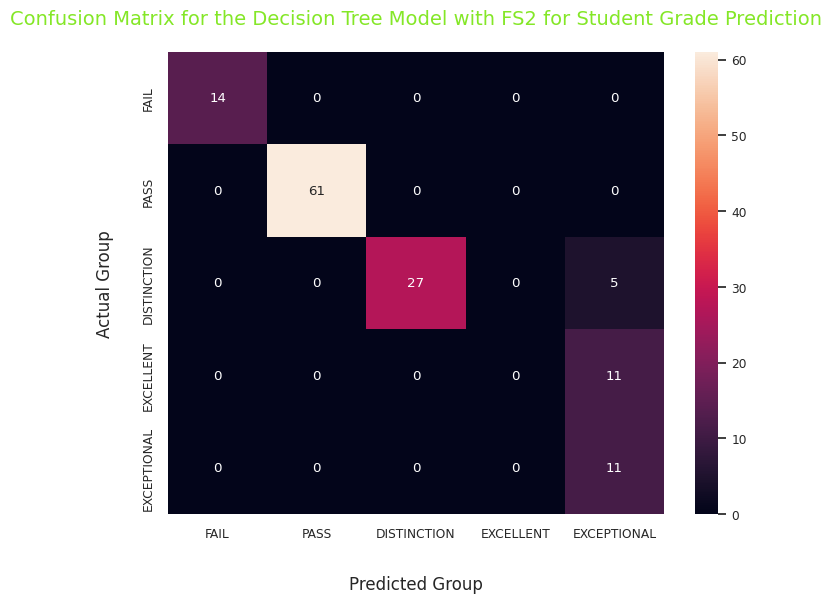

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_j48_fs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Decision Tree Model with FS2 for Student Grade Prediction", color = '#84E727', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_j48_fs2))

Accuracy Score :  0.875968992248062


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_j48_fs2,average='weighted',labels=np.unique(y_pred_j48_fs2)))

Precision Score :  0.9447583176396736


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_j48_fs2,average='weighted',labels=np.unique(y_pred_j48_fs2)))

Recall Score :  0.9576271186440678


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_j48_fs2,average='weighted',labels=np.unique(y_pred_j48_fs2)))

F1 Score :  0.937767429202135


##<font color = 'orange'>Naive - Bayes</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
naive_bayesian_model_fs2 = MultinomialNB(class_prior=[5,3,2,1,4])
naive_bayesian_model_fs2.fit(X_train_fs2,y_train_fs2)
y_pred_nb_fs2 = naive_bayesian_model_fs2.predict(X_test_fs2)

In [ ]:
y_pred_nb_fs2

array([0, 1, 1, 1, 3, 1, 0, 1, 2, 0, 0, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 4, 1, 0, 1, 4, 4, 2, 2, 4, 2, 4, 1, 2, 2, 4, 2, 4, 1, 2,
       3, 1, 3, 2, 2, 0, 1, 2, 2, 1, 3, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 4, 2, 1, 1, 2, 1, 1, 2, 4, 1, 0, 4, 2,
       1, 0, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_nb_fs2 = confusion_matrix(y_test_fs2, y_pred_nb_fs2)
print(cf_matrix_nb_fs2)

[[11  3  0  0  0]
 [10 43  8  0  0]
 [ 0  3 27  2  0]
 [ 0  0  3  5  3]
 [ 0  0  0  0 11]]


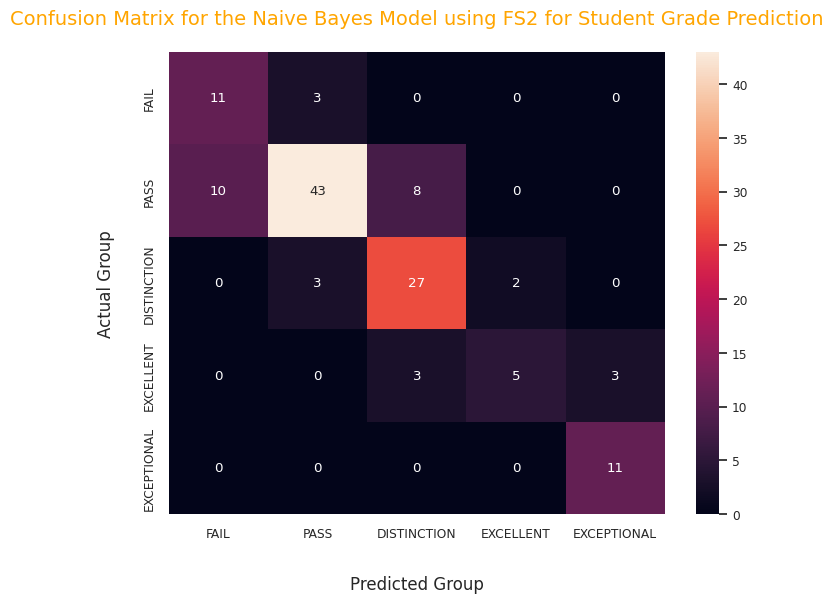

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_nb_fs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Naive Bayes Model using FS2 for Student Grade Prediction", color = 'Orange', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_nb_fs2))

Accuracy Score :  0.751937984496124


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_nb_fs2,average='weighted',labels=np.unique(y_pred_nb_fs2)))

Precision Score :  0.7759750983216623


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_nb_fs2,average='weighted',labels=np.unique(y_pred_nb_fs2)))

Recall Score :  0.751937984496124


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_nb_fs2,average='weighted',labels=np.unique(y_pred_nb_fs2)))

F1 Score :  0.7516878642460039


##<font color = 'FB03FF'>k - Nearest Neighbours</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model_fs2 = KNeighborsClassifier(n_neighbors = 2) #160 
knn_model_fs2.fit(X_train_fs2,y_train_fs2)
y_pred_knn_fs2 = knn_model_fs2.predict(X_test_fs2)

In [ ]:
y_pred_knn_fs2

array([0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 4, 1, 1, 3, 2, 3, 1, 2, 2, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 1, 3, 3, 2, 2, 2, 2, 3, 1, 1, 2, 4, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 3, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 3,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 3, 2,
       0, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 3, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_knn_fs2 = confusion_matrix(y_test_fs2, y_pred_knn_fs2)
print(cf_matrix_knn_fs2)

[[10  4  0  0  0]
 [ 8 52  1  0  0]
 [ 0  2 29  1  0]
 [ 0  0  8  2  1]
 [ 0  0  2  7  2]]


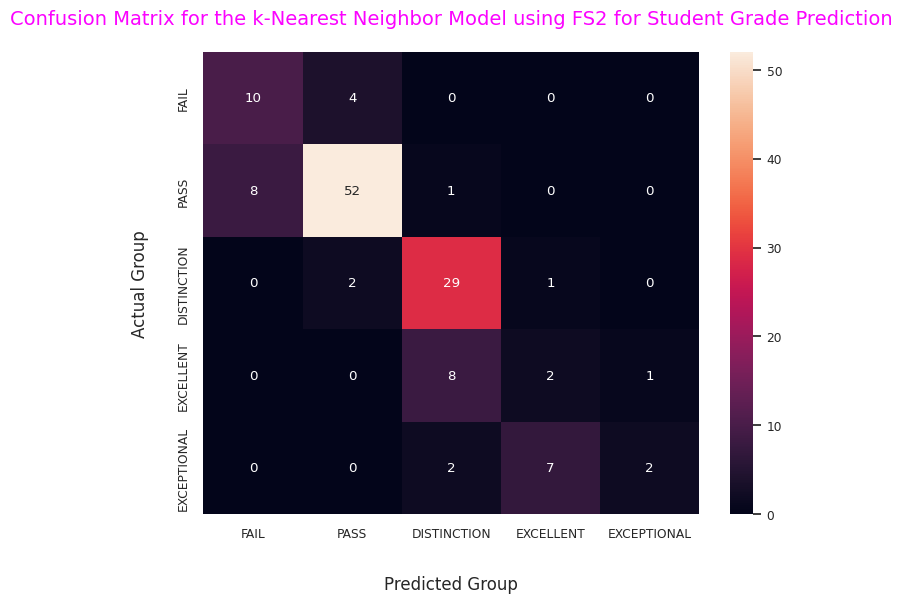

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_knn_fs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the k-Nearest Neighbor Model using FS2 for Student Grade Prediction", color = '#FB03FF', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_knn_fs2))

Accuracy Score :  0.7364341085271318


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_knn_fs2,average='micro',labels=np.unique(y_pred_knn_fs2)))

Precision Score :  0.7364341085271318


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_knn_fs2,average='weighted',labels=np.unique(y_pred_knn_fs2)))

Recall Score :  0.7364341085271318


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_knn_fs2,average = 'weighted',labels=np.unique(y_pred_knn_fs2)))

F1 Score :  0.7215255611288443


##<font color = 'aqua'>Logistic Regression </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression_model_fs2 = LogisticRegression(solver = 'liblinear', random_state = 20  )#C = 0.1 , class_weight = 'balanced', multi_class = 'multinomial', solver = 'sag', random_state = 18)
logistic_regression_model_fs2.fit(X_train_fs2,y_train_fs2)
y_pred_lr_fs2 = logistic_regression_model_fs2.predict(X_test_fs2)

In [ ]:
y_pred_lr_fs2

array([0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 1, 1, 1, 4, 4, 2, 1, 2, 2, 4, 1, 1, 2, 4, 2, 4, 1, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_lr_fs2 = confusion_matrix(y_test_fs2, y_pred_lr_fs2)
print(cf_matrix_lr_fs2)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  4 28  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  0 11]]


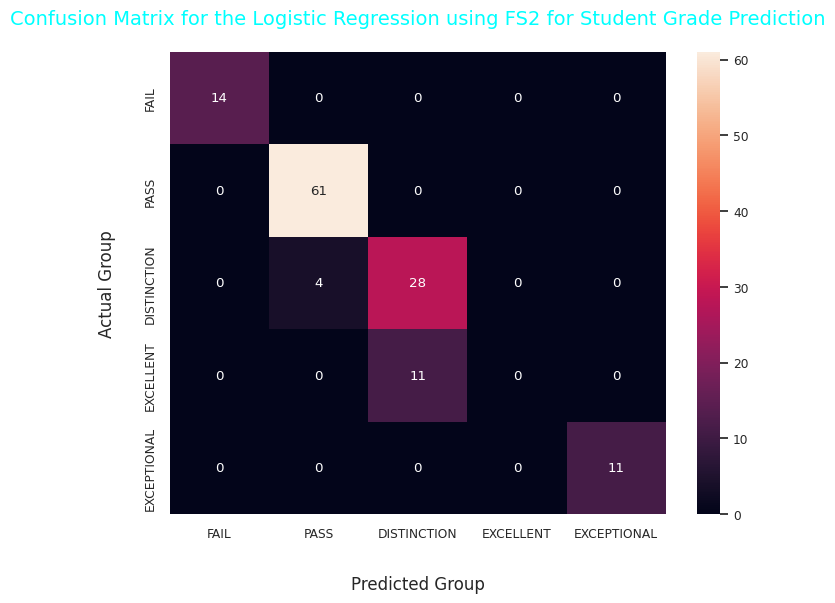

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_lr_fs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Logistic Regression using FS2 for Student Grade Prediction", color ='aqua', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_lr_fs2))

Accuracy Score :  0.8837209302325582


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_lr_fs2,average='macro',labels=np.unique(y_pred_lr_fs2)))

Precision Score :  0.9141025641025641


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_lr_fs2,average='weighted',labels=np.unique(y_pred_lr_fs2)))

Recall Score :  0.9661016949152542


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_lr_fs2,average='macro',labels=np.unique(y_pred_lr_fs2)))

F1 Score :  0.9392465906550413


##<font color = 'Olive'> Support Vector Machines </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn import svm

In [ ]:
svm_model_fs2 = svm.SVC(kernel = 'poly', degree = 22, class_weight = 'balanced') #C = 0.4, kernel = 'poly', class_weight='balanced', degree = 1
svm_model_fs2.fit(X_train_fs2,y_train_fs2)
y_pred_svm_fs2 = svm_model_fs2.predict(X_test_fs2)

In [ ]:
y_pred_svm_fs2

array([0, 0, 1, 2, 3, 1, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 4, 3, 1, 0, 1, 2, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 0, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_svm_fs2 = confusion_matrix(y_test_fs2, y_pred_svm_fs2)
print(cf_matrix_svm_fs2)

[[14  0  0  0  0]
 [ 2 55  4  0  0]
 [ 0  0 28  4  0]
 [ 0  0  0  9  2]
 [ 0  0  0  0 11]]


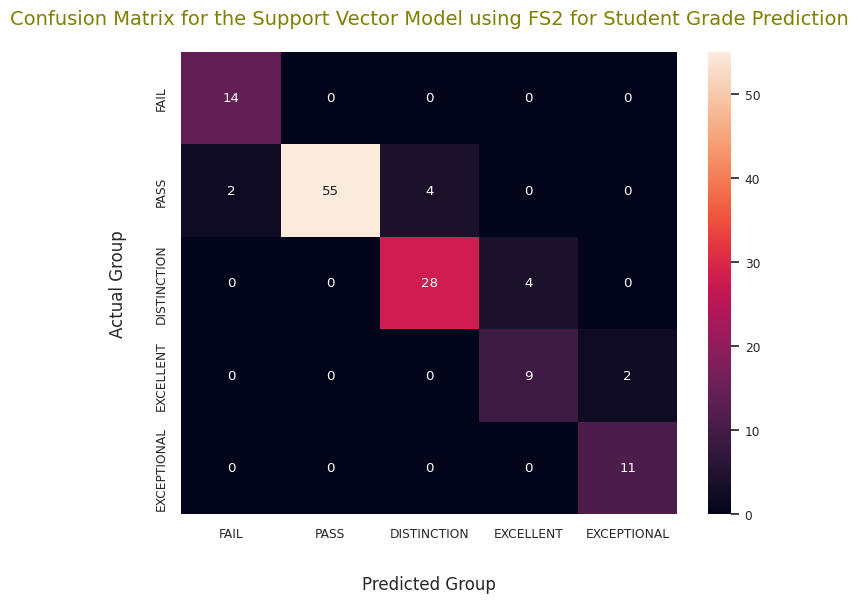

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_svm_fs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Support Vector Model using FS2 for Student Grade Prediction", color = 'Olive', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_svm_fs2))

Accuracy Score :  0.9069767441860465


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_svm_fs2,average='weighted',labels=np.unique(y_pred_svm_fs2)))

Precision Score :  0.9160703637447823


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_svm_fs2,average='macro',labels=np.unique(y_pred_svm_fs2)))

Recall Score :  0.9189642324888225


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_svm_fs2,average='macro',labels=np.unique(y_pred_svm_fs2)))

F1 Score :  0.8846551724137932


# <font color = "6D11E2"> InfoGainAttributeEval - Feature Selection 3 (FS -3) </font>

##Selecting Features

In [ ]:
x_fs = df_copy.drop(['Group'], axis = 1)
y_fs = df_copy['Group']

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

def info_gain_attribute_eval(X, y, n_features_to_select):
    """
    Implements an information gain attribute evaluation feature selection method.

    Parameters:
    -----------
    X : pandas DataFrame or numpy array
        The input feature matrix.
    y : pandas Series or numpy array
        The target variable.
    n_features_to_select : int
        The number of features to select.

    Returns:
    --------
    best_features : list
        The list of column names of the best features selected.
    """
    # Calculate the mutual information scores for each feature
    mi_scores = mutual_info_classif(X, y, random_state = 5)

    # Sort the features by their mutual information scores in descending order
    feature_scores = [(X.columns[i], mi_scores[i]) for i in range(X.shape[1])]
    feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

    # Select the top n_features_to_select features with the highest mutual information scores
    best_features_fs3 = [feature_scores[i][0] for i in range(n_features_to_select)]

    return best_features_fs3

# Example usage
# Assume X is your input feature matrix and y is the target variable

# Call the info_gain_attribute_eval function
best_features_fs3 = info_gain_attribute_eval(x_fs, y_fs, n_features_to_select=5)

# The best_features variable will contain the column names of the best 5 features selected by the InfoGainAttributeEval feature selection method.


In [ ]:
print(best_features_fs3)

['Total Marks', 'Grade Pointer Average', 'Grade', 'Credit Hour', 'Year']


##Splitting into Training and Testing

In [ ]:
X_fs3 = df_copy.loc[: , ['Total Marks', 'Grade Pointer Average', 'Grade', 'Credit Hour', 'Year']]
y_fs3 = df_copy.iloc[: , -1]

In [ ]:
X_fs3.head()

,Total Marks,Grade Pointer Average,Grade,Credit Hour,Year
0,50,1.3,9,2.0,2017
1,54,1.3,9,1.0,2018
2,92,3.8,1,1.0,2018
3,84,3.3,3,1.0,2016
4,47,1.0,10,3.0,2019


In [ ]:
y_fs3.head()

0    1
1    1
2    3
3    2
4    1
Name: Group, dtype: int64

In [ ]:
X_train_fs3, X_test_fs3, y_train_fs3, y_test_fs3 = train_test_split(X_fs3, y_fs3, test_size = 0.1, random_state = 50)

In [ ]:
len(X_train_fs3)

1153

In [ ]:
len(y_test_fs3)

129

## <font color = '84E727'> Decision Trees </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree_model_fs3 = DecisionTreeClassifier(splitter = 'random', random_state = 1, min_weight_fraction_leaf= 0.1)
decision_tree_model_fs3.fit(X_train_fs3, y_train_fs3)

DecisionTreeClassifier(min_weight_fraction_leaf=0.1, random_state=1,
                       splitter='random')

In [ ]:
y_pred_j48_fs3 = decision_tree_model_fs3.predict(X_test_fs3)
print(y_pred_j48_fs3)

[0 0 1 2 4 1 0 1 1 1 1 4 1 1 4 2 4 1 2 4 1 1 1 1 1 2 2 2 1 2 0 2 1 2 0 0 1
 2 2 1 0 1 1 0 2 1 0 4 1 1 1 4 4 2 1 4 2 4 1 1 2 4 4 4 1 4 2 1 4 4 1 0 1 1
 2 1 4 1 1 1 1 1 1 2 1 1 1 4 1 1 1 0 0 1 1 0 1 4 2 2 1 2 1 1 2 4 1 0 4 2 1
 1 1 2 1 1 2 2 1 1 1 1 1 1 2 1 2 4 1]


###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_j48_fs3 = confusion_matrix(y_test_fs3, y_pred_j48_fs3)
print(cf_matrix_j48_fs3)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  4 28  0  0]
 [ 0  0  0  0 11]
 [ 0  0  0  0 11]]


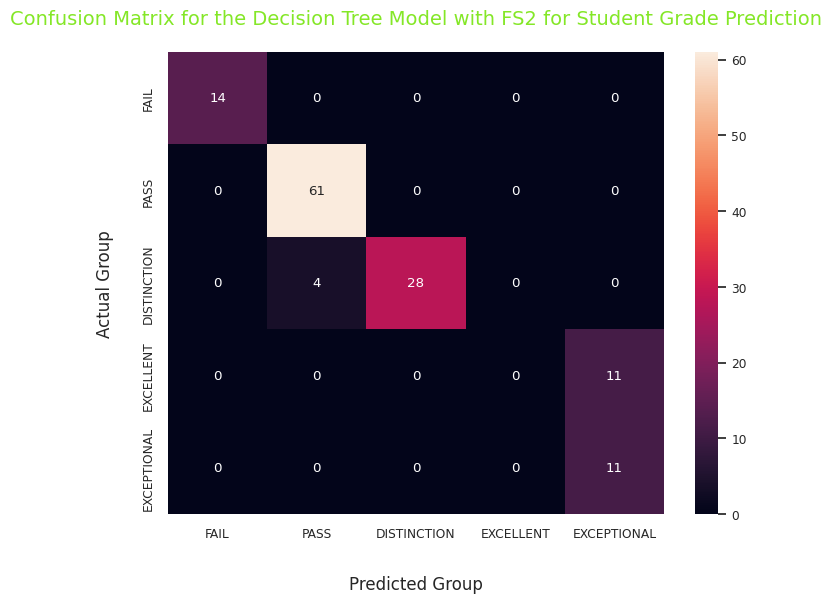

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_j48_fs3, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Decision Tree Model with FS2 for Student Grade Prediction", color = '#84E727', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_j48_fs3))

Accuracy Score :  0.8837209302325582


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_j48_fs3,average='weighted',labels=np.unique(y_pred_j48_fs3)))

Precision Score :  0.9215775749674054


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_j48_fs3,average='micro',labels=np.unique(y_pred_j48_fs3)))

Recall Score :  0.9661016949152542


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_j48_fs3,average='weighted',labels=np.unique(y_pred_j48_fs3)))

F1 Score :  0.9344363734194242


##<font color = 'orange'>Naive - Bayes</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
naive_bayesian_model_fs3 = MultinomialNB(class_prior=[1,3,2,5,4]) #  (class_prior=[5,3,2,1,4])
naive_bayesian_model_fs3.fit(X_train_fs3,y_train_fs3)
y_pred_nb_fs3 = naive_bayesian_model_fs3.predict(X_test_fs3)

In [ ]:
y_pred_nb_fs3

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 3, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 3, 4, 3, 4, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 3, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_nb_fs3 = confusion_matrix(y_test_fs3, y_pred_nb_fs3)
print(cf_matrix_nb_fs3)

[[14  0  0  0  0]
 [ 0 57  4  0  0]
 [ 0  0 23  9  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


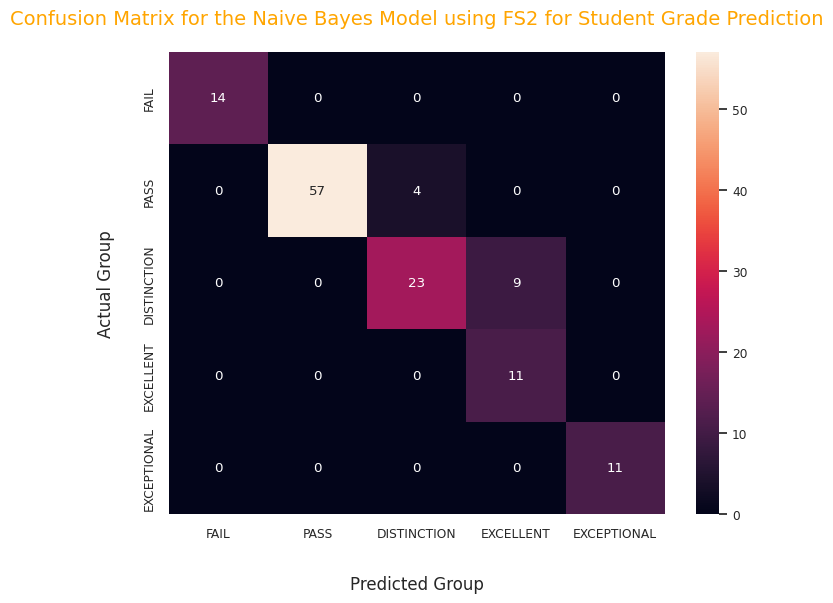

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_nb_fs3, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Naive Bayes Model using FS2 for Student Grade Prediction", color = 'Orange', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_nb_fs3))

Accuracy Score :  0.8992248062015504


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_nb_fs3,average='weighted',labels=np.unique(y_pred_nb_fs3)))

Precision Score :  0.9248779787539477


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_nb_fs3,average='micro',labels=np.unique(y_pred_nb_fs3)))

Recall Score :  0.8992248062015504


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_nb_fs3,average='weighted',labels=np.unique(y_pred_nb_fs3)))

F1 Score :  0.9045566476364854


##<font color = 'FB03FF'>k - Nearest Neighbours</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model_fs3 = KNeighborsClassifier(n_neighbors = 220, algorithm = 'kd_tree') #160 
knn_model_fs3.fit(X_train_fs3,y_train_fs3)
y_pred_knn_fs3 = knn_model_fs3.predict(X_test_fs3)

cf_matrix_knn_fs3 = confusion_matrix(y_test_fs3, y_pred_knn_fs3)
print(cf_matrix_knn_fs3)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  5  1  5]
 [ 0  0  0  0 11]]


In [ ]:
y_pred_knn_fs3

array([0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 4, 1, 1, 1, 4, 4, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 4, 1, 4,
       2, 1, 4, 3, 1, 0, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_knn_fs3 = confusion_matrix(y_test_fs3, y_pred_knn_fs3)
print(cf_matrix_knn_fs3)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  5  1  5]
 [ 0  0  0  0 11]]


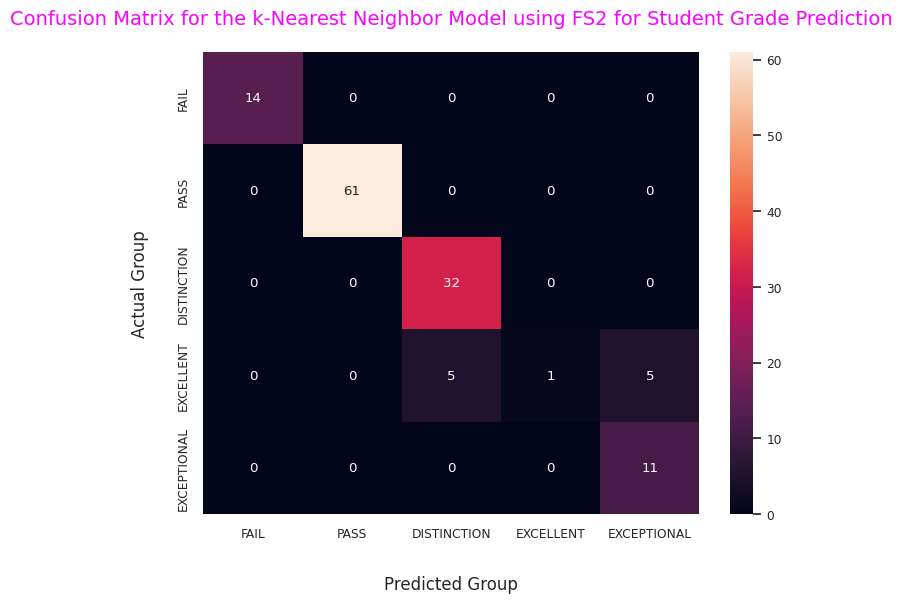

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_knn_fs3, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the k-Nearest Neighbor Model using FS2 for Student Grade Prediction", color = '#FB03FF', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_knn_fs3))

Accuracy Score :  0.9224806201550387


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_knn_fs3,average='macro',labels=np.unique(y_pred_knn_fs3)))

Precision Score :  0.910472972972973


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_knn_fs3,average='micro',labels=np.unique(y_pred_knn_fs3)))

Recall Score :  0.9224806201550387


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_knn_fs3,average = 'weighted',labels=np.unique(y_pred_knn_fs3)))

F1 Score :  0.8951740753223733


##<font color = 'aqua'>Logistic Regression </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression_model_fs3 = LogisticRegression(solver = 'liblinear', random_state = 20  )#C = 0.1 , class_weight = 'balanced', multi_class = 'multinomial', solver = 'sag', random_state = 18)
logistic_regression_model_fs3.fit(X_train_fs3,y_train_fs3)
y_pred_lr_fs3 = logistic_regression_model_fs3.predict(X_test_fs3)



In [ ]:
y_pred_lr_fs3

array([0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 1, 1, 1, 4, 4, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 4, 1, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 4,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_lr_fs3 = confusion_matrix(y_test_fs3, y_pred_lr_fs3)
print(cf_matrix_lr_fs3)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  2 30  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  0 11]]


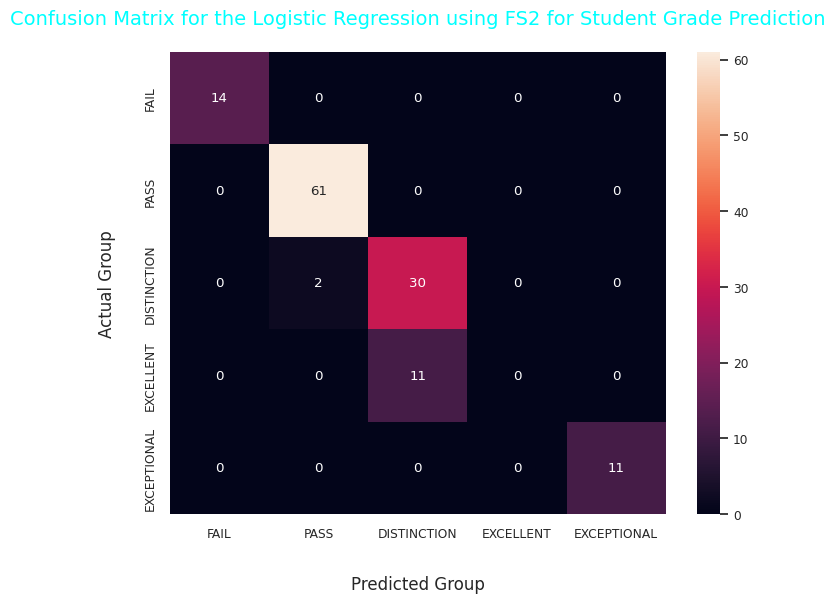

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_lr_fs3, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Logistic Regression using FS2 for Student Grade Prediction", color ='aqua', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_lr_fs3))

Accuracy Score :  0.8992248062015504


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_lr_fs3,average='macro',labels=np.unique(y_pred_lr_fs3)))

Precision Score :  0.9249903213317847


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_lr_fs3,average='weighted',labels=np.unique(y_pred_lr_fs3)))

Recall Score :  0.9830508474576272


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_lr_fs3,average='micro',labels=np.unique(y_pred_lr_fs3)))

F1 Score :  0.9392712550607288


##<font color = 'Olive'> Support Vector Machines </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
svm_model_fs3 = svm.SVC(kernel = 'poly', degree = 22, class_weight = 'balanced') #C = 0.4, kernel = 'poly', class_weight='balanced', degree = 1
svm_model_fs3.fit(X_train_fs3,y_train_fs3)
y_pred_svm_fs3 = svm_model_fs3.predict(X_test_fs3)

In [ ]:
y_pred_svm_fs3

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 3, 4, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       0, 1, 0, 3, 1, 1, 2, 3, 1, 1, 0, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_svm_fs3 = confusion_matrix(y_test_fs3, y_pred_svm_fs3)
print(cf_matrix_svm_fs3)

[[14  0  0  0  0]
 [ 5 53  3  0  0]
 [ 0  0 27  5  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


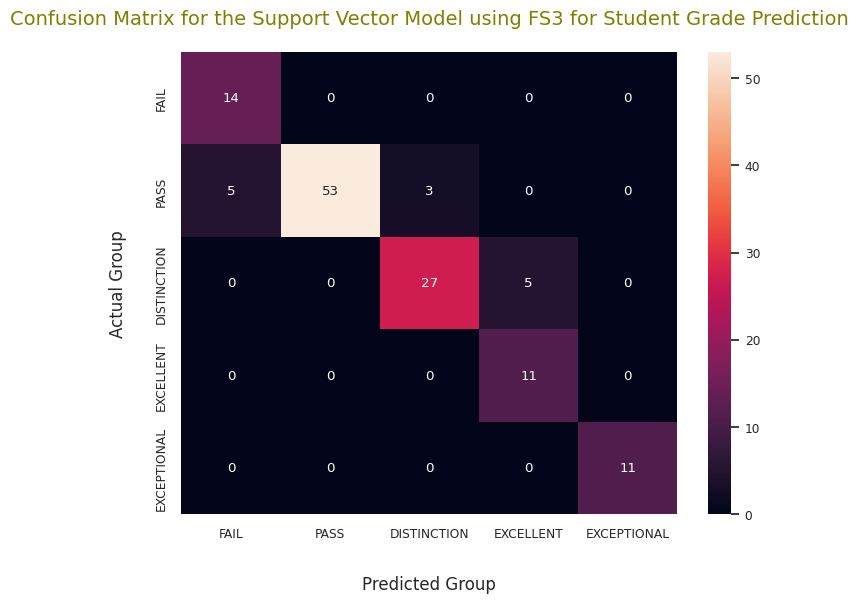

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_svm_fs3, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Support Vector Model using FS3 for Student Grade Prediction", color = 'Olive', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_svm_fs3))

Accuracy Score :  0.8992248062015504


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_svm_fs3,average='weighted',labels=np.unique(y_pred_svm_fs3)))

Precision Score :  0.9199867401060791


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_svm_fs3,average='macro',labels=np.unique(y_pred_svm_fs3)))

Recall Score :  0.9425204918032787


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_svm_fs3,average='macro',labels=np.unique(y_pred_svm_fs3)))

F1 Score :  0.8928183933277312


# <font color='DodgerBlue'> SMOTE </font> + <font color = '60063B'> WrapperSubsetEval - (SFS-1)</font>

##Splitting the data for implementing SMOTE

In [ ]:
# X_sfs1 = df_copy.loc[: , ['Session', 'Grade', 'Grade Pointer Average', 'Total Marks', 'Year', 'Class']]
# y_sfs1 = df_copy.loc[: , ['Group']]

In [ ]:
y_train_fs1.value_counts()

1    574
2    285
0    130
4     85
3     79
Name: Group, dtype: int64

In [ ]:
X_train_fs1.shape,y_train_fs1.shape

((1153, 6), (1153,))

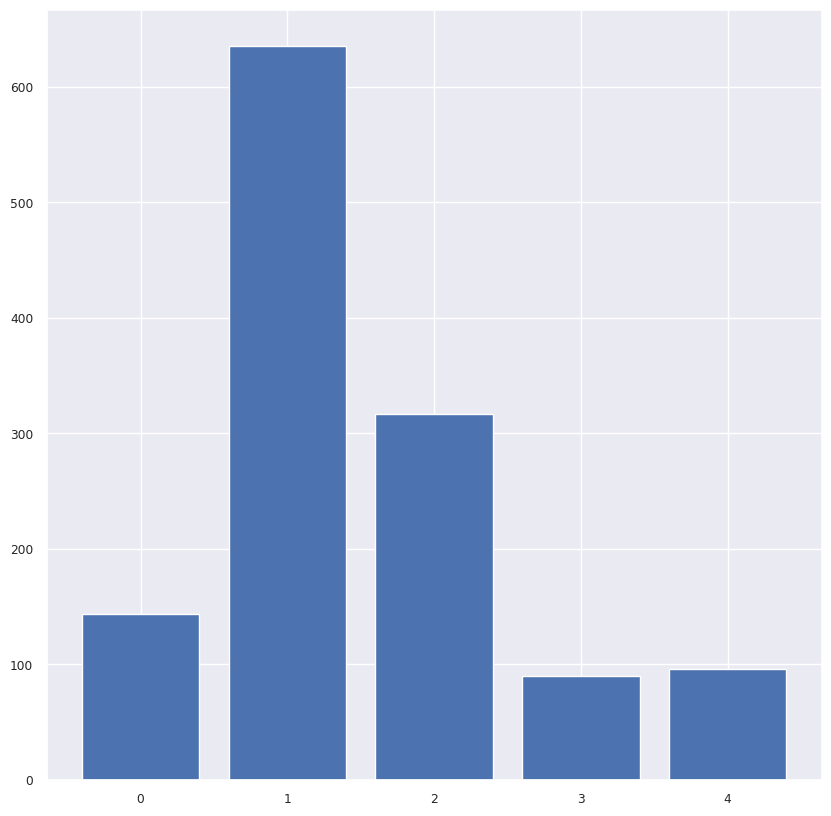

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_fs1)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#We have to split the SMOTE sampling into 1:1:2:2:2 ratio
#The values of the Oversampling strategy would become
#{0: 71, 1: 71, 2: 142, 3: 142, 4:142}

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 16)
X_train_fs1_sm, y_train_fs1_sm = sm.fit_resample(X_train_fs1, y_train_fs1.ravel())
X_train_fs1_sm.shape, y_train_fs1_sm.shape

((2870, 6), (2870,))

In [ ]:
len(y_train_fs1_sm[y_train_fs1_sm==0]),len(y_train_fs1_sm[y_train_fs1_sm==1]),len(y_train_fs1_sm[y_train_fs1_sm==2]),len(y_train_fs1_sm[y_train_fs1_sm==3]),len(y_train_fs1_sm[y_train_fs1_sm==4])

(574, 574, 574, 574, 574)

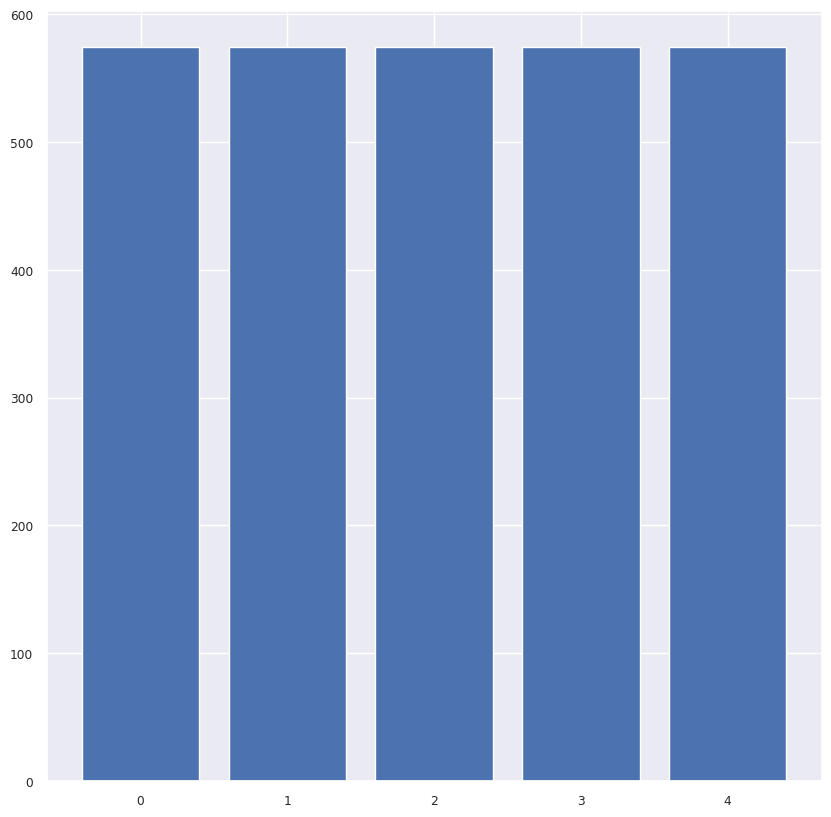

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train_fs1_sm)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from collections import Counter
print("Before SMOTE : ", Counter(y_train_fs1))
print("After SMOTE : ", Counter(y_train_fs1_sm))

Before SMOTE :  Counter({1: 574, 2: 285, 0: 130, 4: 85, 3: 79})
After SMOTE :  Counter({1: 574, 2: 574, 0: 574, 3: 574, 4: 574})


In [ ]:
strategy = {0:600, 1:600, 2:1200, 3:1200, 4:1200}
smote = SMOTE(sampling_strategy=strategy)
X_train_sfs1, y_train_sfs1 = smote.fit_resample(X_train_fs1, y_train_fs1.ravel())
X_train_sfs1.shape, y_train_sfs1.shape

((4800, 6), (4800,))

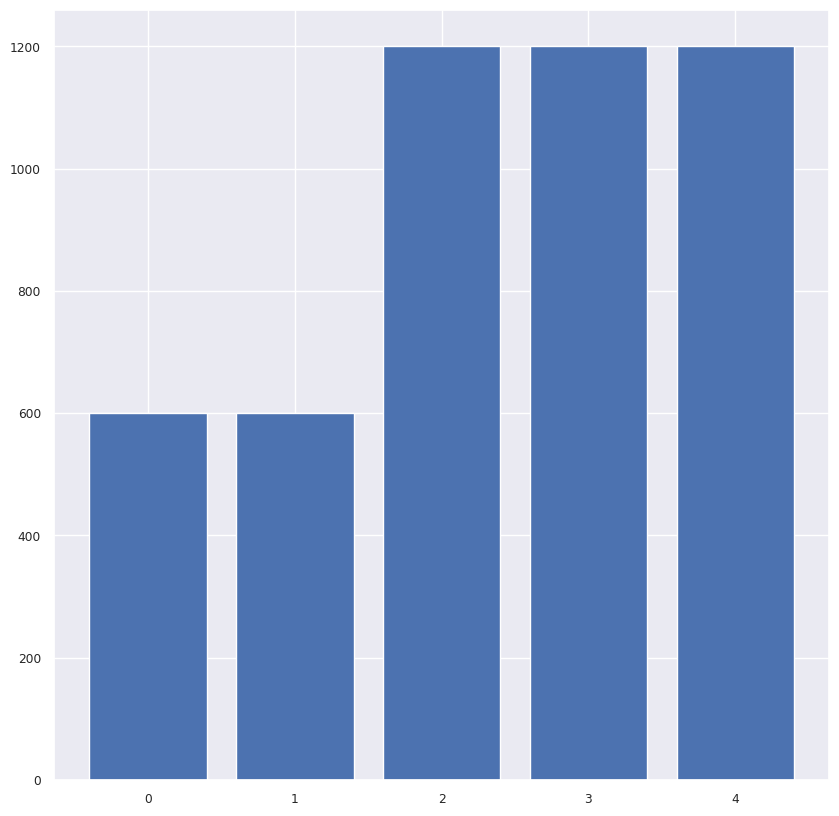

In [ ]:
counter = Counter(y_train_sfs1)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## <font color = '84E727'> Decision Trees </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Decision_tree_sfs1 = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced',splitter = 'random', random_state = 1, min_weight_fraction_leaf= 0.1)
Decision_tree_sfs1.fit(X_train_sfs1, y_train_sfs1)
y_pred_j48_sfs1 = Decision_tree_sfs1.predict(X_test_fs1)

In [ ]:
y_pred_j48_sfs1

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 0, 1, 2, 4, 3, 4, 1, 3,
       2, 0, 3, 3, 1, 0, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 4, 2, 2, 1, 2, 1, 1, 2, 3, 1, 0, 4, 2,
       0, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_j48_fs1_sm = confusion_matrix(y_test_fs1, y_pred_j48_sfs1)
print(cf_matrix_j48_fs1_sm)

[[14  0  0  0  0]
 [ 9 52  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


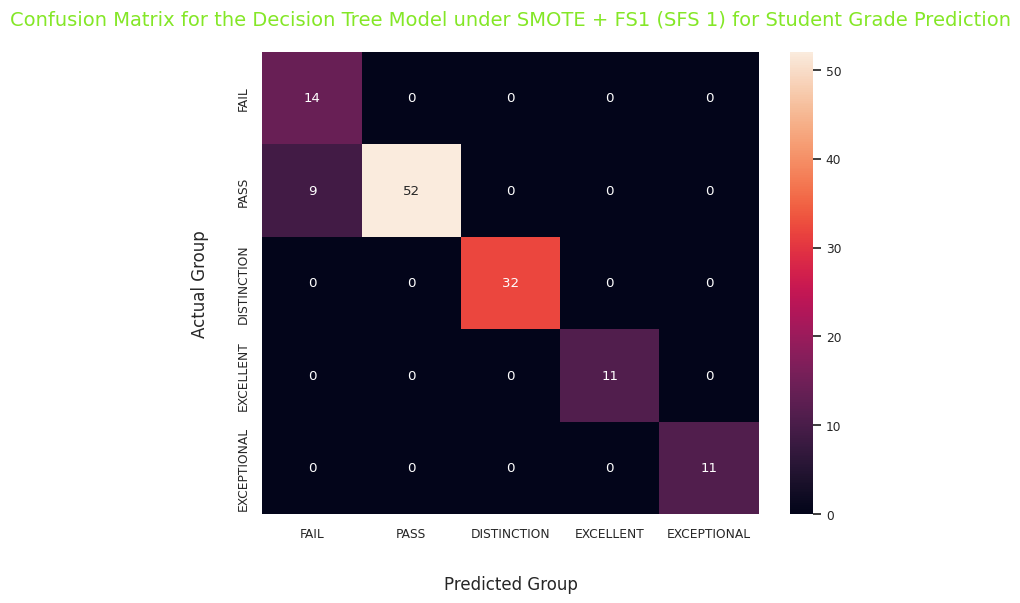

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_j48_fs1_sm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Decision Tree Model under SMOTE + FS1 (SFS 1) for Student Grade Prediction", color = '#84E727', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_j48_sfs1))

Accuracy Score :  0.9302325581395349


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_j48_sfs1,average='macro',labels=np.unique(y_pred_j48_sfs1)))

Precision Score :  0.9217391304347826


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_j48_sfs1,average='macro',labels=np.unique(y_pred_j48_sfs1)))

Recall Score :  0.9704918032786886


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_j48_sfs1,average='macro',labels=np.unique(y_pred_j48_sfs1)))

F1 Score :  0.9354221478115283


##<font color = 'orange'>Naive - Bayes</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
naive_bayesian_model_sfs1 = MultinomialNB(class_prior=[1,5,3,4,2]) #
naive_bayesian_model_sfs1.fit(X_train_sfs1,y_train_sfs1)
y_pred_nb_sfs1 = naive_bayesian_model_sfs1.predict(X_test_fs1)

In [ ]:
y_pred_nb_sfs1

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 3, 3, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_nb_sfs1 = confusion_matrix(y_test_fs1, y_pred_nb_sfs1)
print(cf_matrix_nb_sfs1)

[[14  0  0  0  0]
 [ 0 56  5  0  0]
 [ 0  0 25  7  0]
 [ 0  0  0 11  0]
 [ 0  0  0  1 10]]


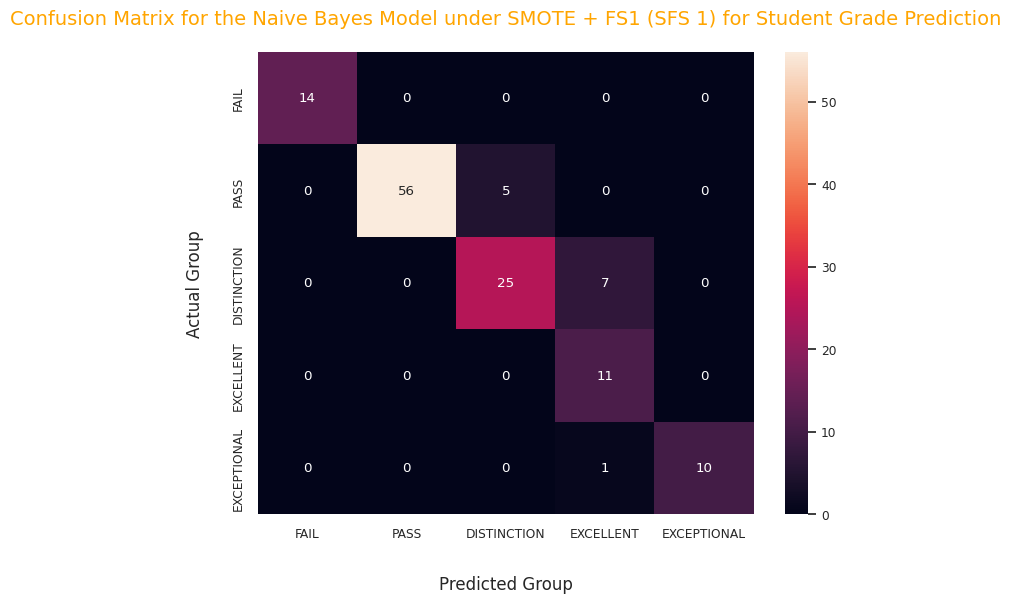

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_nb_sfs1, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Naive Bayes Model under SMOTE + FS1 (SFS 1) for Student Grade Prediction", color = 'Orange', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_nb_sfs1))

Accuracy Score :  0.8992248062015504


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_nb_sfs1,average='weighted',labels=np.unique(y_pred_nb_sfs1)))

Precision Score :  0.9227526179790562


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_nb_sfs1,average='weighted',labels=np.unique(y_pred_nb_sfs1)))

Recall Score :  0.8992248062015504


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_nb_sfs1,average='weighted',labels=np.unique(y_pred_nb_sfs1)))

F1 Score :  0.9049803965032772


##<font color = 'FB03FF'>k - Nearest Neighbours</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
knn_model_sfs1 = KNeighborsClassifier(n_neighbors = 100)
knn_model_sfs1.fit(X_train_sfs1,y_train_sfs1)
y_pred_knn_sfs1 = knn_model_sfs1.predict(X_test_fs1)

In [ ]:
y_pred_knn_fs1

array([0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 4, 1, 1, 1, 4, 4, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 4, 1, 4,
       2, 1, 4, 3, 1, 0, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_knn_sfs1 = confusion_matrix(y_test_fs1, y_pred_knn_sfs1)
print(cf_matrix_knn_sfs1)

[[14  0  0  0  0]
 [ 4 54  3  0  0]
 [ 0  0 30  2  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


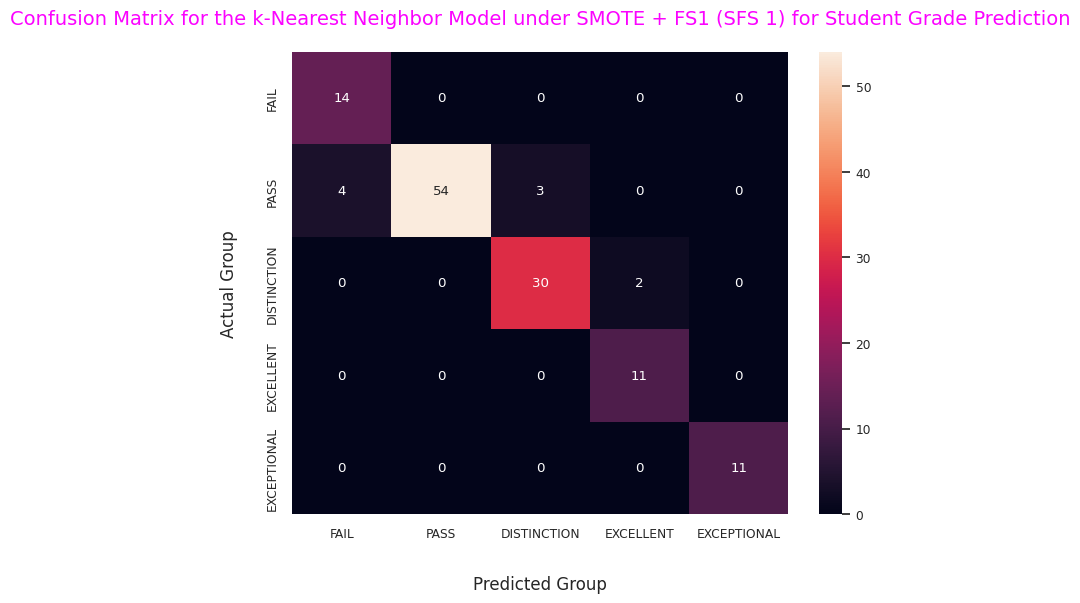

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_knn_sfs1, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the k-Nearest Neighbor Model under SMOTE + FS1 (SFS 1) for Student Grade Prediction", color = '#FB03FF', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_knn_sfs1))

Accuracy Score :  0.9302325581395349


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_knn_sfs1,average='weighted',labels=np.unique(y_pred_knn_sfs1)))

Precision Score :  0.9402131030038007


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_knn_sfs1,average='macro',labels=np.unique(y_pred_knn_sfs1)))

Recall Score :  0.9645491803278687


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_knn_sfs1,average='macro',labels=np.unique(y_pred_knn_sfs1)))

F1 Score :  0.9307748049052396


##<font color = 'aqua'>Logistic Regression </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model_sfs1 = LogisticRegression(solver='liblinear')
logistic_model_sfs1.fit(X_train_sfs1, y_train_sfs1)
y_pred_lr_sfs1 = logistic_model_sfs1.predict(X_test_fs1)

In [ ]:
y_pred_lr_sfs1

array([0, 0, 1, 2, 3, 1, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_lr_fs1_sm = confusion_matrix(y_test_fs1, y_pred_lr_sfs1)
print(cf_matrix_lr_fs1_sm)

[[14  0  0  0  0]
 [ 0 53  8  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


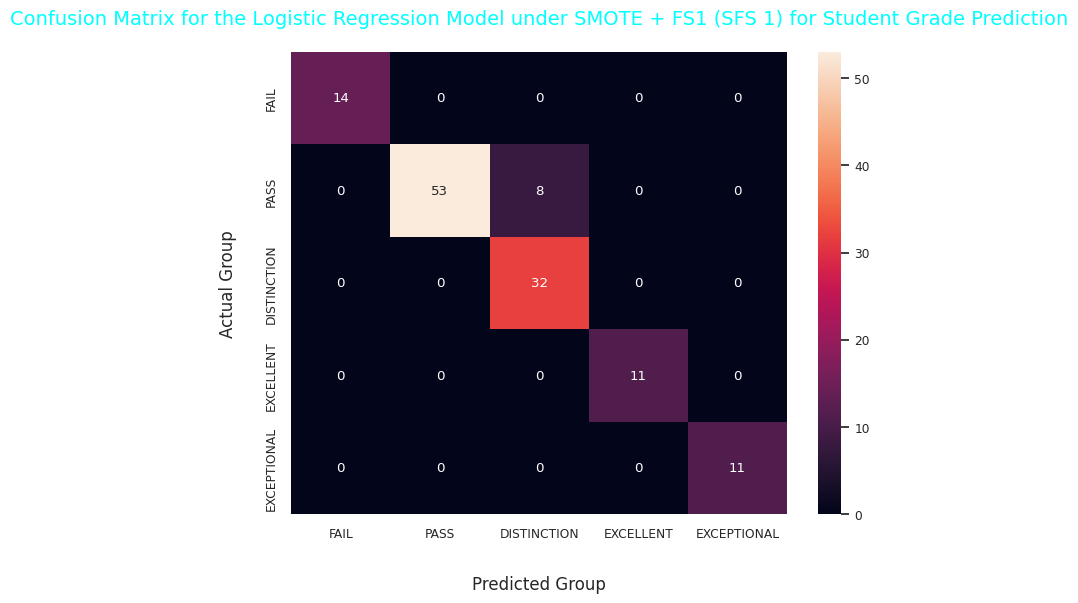

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_lr_fs1_sm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Logistic Regression Model under SMOTE + FS1 (SFS 1) for Student Grade Prediction", color = 'aqua', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_lr_sfs1))

Accuracy Score :  0.937984496124031


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_lr_sfs1,average='weighted',labels=np.unique(y_pred_lr_sfs1)))

Precision Score :  0.9503875968992248


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_lr_sfs1,average='macro',labels=np.unique(y_pred_lr_sfs1)))

Recall Score :  0.9737704918032787


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_lr_sfs1,average='weighted',labels=np.unique(y_pred_lr_sfs1)))

F1 Score :  0.9392538193027788


##<font color = 'Olive'> Support Vector Machines </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
svm_model_sfs1 = svm.SVC(kernel = 'poly', degree = 22, class_weight = 'balanced', random_state = 30) #C = 0.3, kernel = 'poly', class_weight='balanced', degree = 2, random_state = 10
svm_model_sfs1.fit(X_train_sfs1,y_train_sfs1)
y_pred_svm_sfs1 = svm_model_sfs1.predict(X_test_fs1)

In [ ]:
y_pred_svm_sfs1

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 3, 4, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       0, 1, 0, 3, 1, 1, 2, 3, 1, 1, 0, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_svm_sfs1 = confusion_matrix(y_test_fs1, y_pred_svm_sfs1)
print(cf_matrix_svm_sfs1)

[[14  0  0  0  0]
 [ 5 53  3  0  0]
 [ 0  0 27  5  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


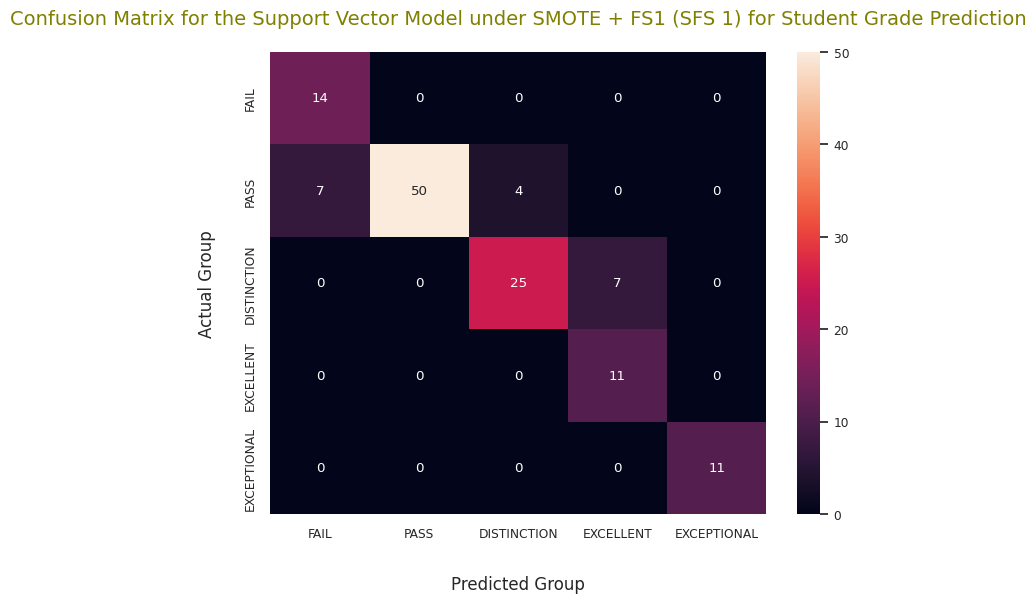

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_svm_smote, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Support Vector Model under SMOTE + FS1 (SFS 1) for Student Grade Prediction", color = 'Olive', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs1, y_pred_svm_sfs1))

Accuracy Score :  0.8992248062015504


In [ ]:
print("Precision Score : ", precision_score(y_test_fs1, y_pred_svm_sfs1,average='weighted',labels=np.unique(y_pred_svm_sfs1)))

Precision Score :  0.9199867401060791


In [ ]:
print("Recall Score : ", recall_score(y_test_fs1, y_pred_svm_sfs1,average='macro',labels=np.unique(y_pred_svm_sfs1)))

Recall Score :  0.9425204918032787


In [ ]:
print("F1 Score : ", f1_score(y_test_fs1, y_pred_svm_sfs1,average='weighted',labels=np.unique(y_pred_svm_sfs1)))

F1 Score :  0.9025737738705455


# <font color='DodgerBlue'> SMOTE </font> + <font color = "11E27F"> ClassiferSubsetEval - (SFS - 2) </font>

##Splitting the data for implementing SMOTE

In [ ]:
y_train_fs2.value_counts()

1    574
2    285
0    130
4     85
3     79
Name: Group, dtype: int64

In [ ]:
X_train_fs2.shape,y_train_fs2.shape

((1153, 6), (1153,))

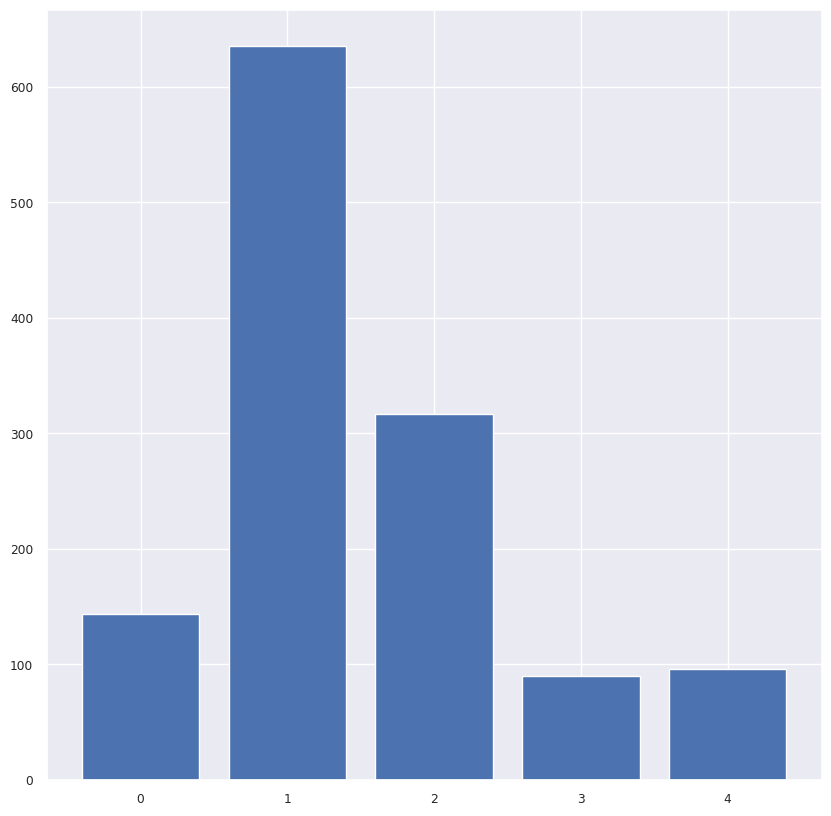

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_fs2)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#We have to split the SMOTE sampling into 1:1:2:2:2 ratio
#The values of the Oversampling strategy would become
#{0: 71, 1: 71, 2: 142, 3: 142, 4:142}

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 16)
X_train_fs2_sm, y_train_fs2_sm = sm.fit_resample(X_train_fs2, y_train_fs2.ravel())
X_train_fs2_sm.shape, y_train_fs2_sm.shape

((2870, 6), (2870,))

In [ ]:
len(y_train_fs2_sm[y_train_fs2_sm==0]),len(y_train_fs2_sm[y_train_fs2_sm==1]),len(y_train_fs2_sm[y_train_fs2_sm==2]),len(y_train_fs2_sm[y_train_fs2_sm==3]),len(y_train_fs2_sm[y_train_fs2_sm==4])

(574, 574, 574, 574, 574)

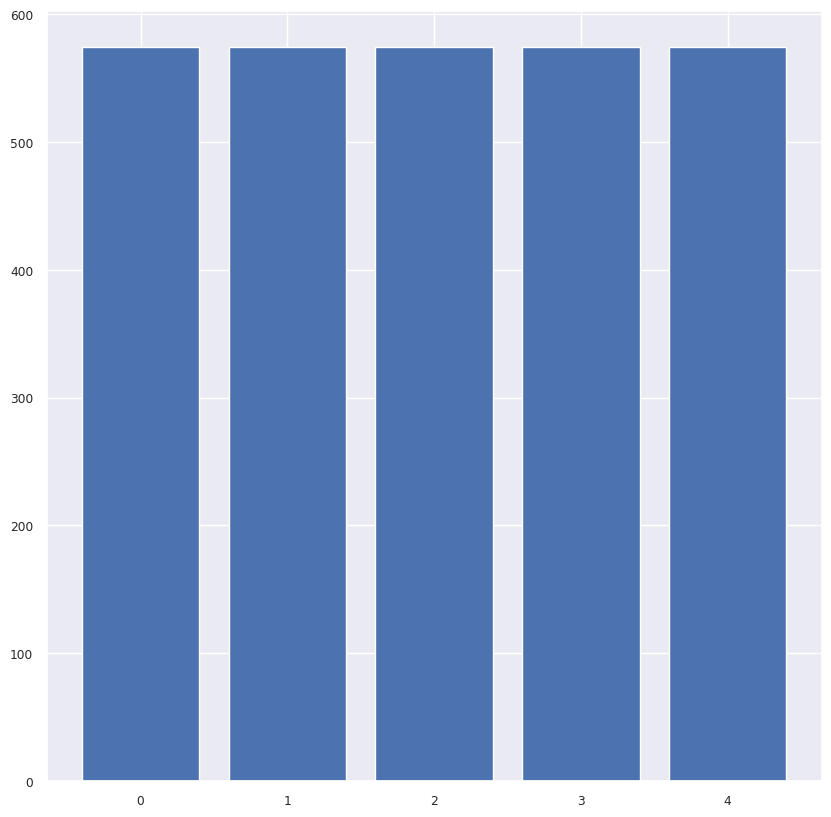

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train_fs2_sm)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from collections import Counter
print("Before SMOTE : ", Counter(y_train_fs2))
print("After SMOTE : ", Counter(y_train_fs2_sm))

Before SMOTE :  Counter({1: 574, 2: 285, 0: 130, 4: 85, 3: 79})
After SMOTE :  Counter({1: 574, 2: 574, 0: 574, 3: 574, 4: 574})


In [ ]:
strategy = {0:600, 1:600, 2:1200, 3:1200, 4:1200}
smote = SMOTE(sampling_strategy=strategy)
X_train_sfs2, y_train_sfs2 = smote.fit_resample(X_train_fs2, y_train_fs2.ravel())
X_train_sfs2.shape, y_train_sfs2.shape

((4800, 6), (4800,))

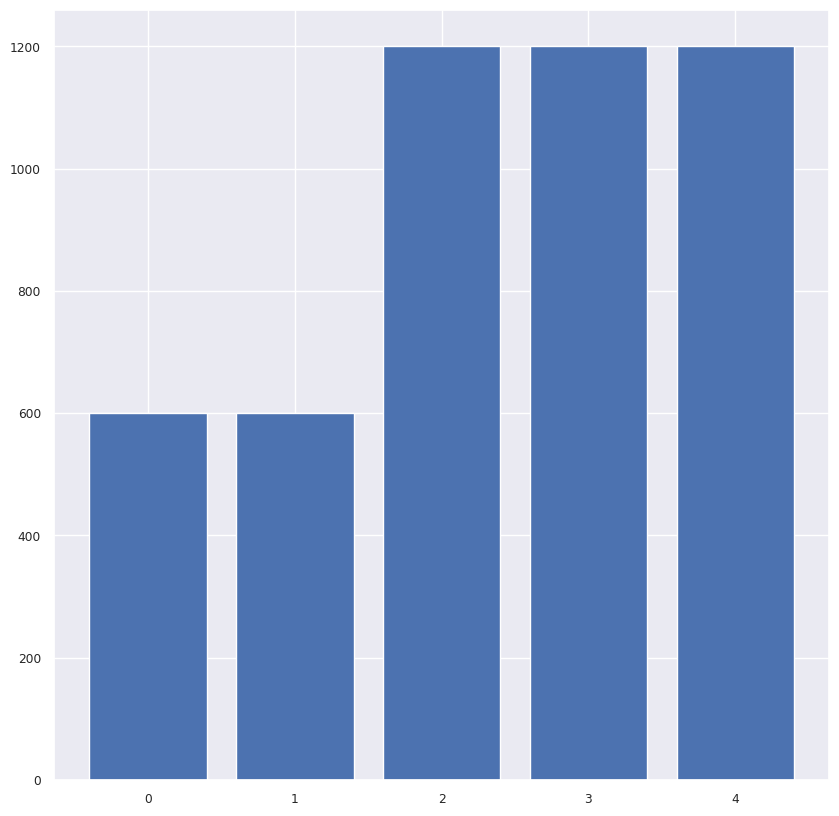

In [ ]:
counter = Counter(y_train_sfs2)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## <font color = '84E727'> Decision Trees </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Decision_tree_sfs2 = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced',splitter = 'random', random_state = 1, min_weight_fraction_leaf= 0.1)
Decision_tree_sfs2.fit(X_train_sfs2, y_train_sfs2)
y_pred_j48_sfs2 = Decision_tree_sfs2.predict(X_test_fs2)

In [ ]:
y_pred_j48_sfs2

array([0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 4, 1, 3,
       2, 1, 3, 3, 1, 0, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 1, 0, 4, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_j48_fs2_sm = confusion_matrix(y_test_fs2, y_pred_j48_sfs2)
print(cf_matrix_j48_fs2_sm)

[[14  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  3  8  0]
 [ 0  0  0  0 11]]


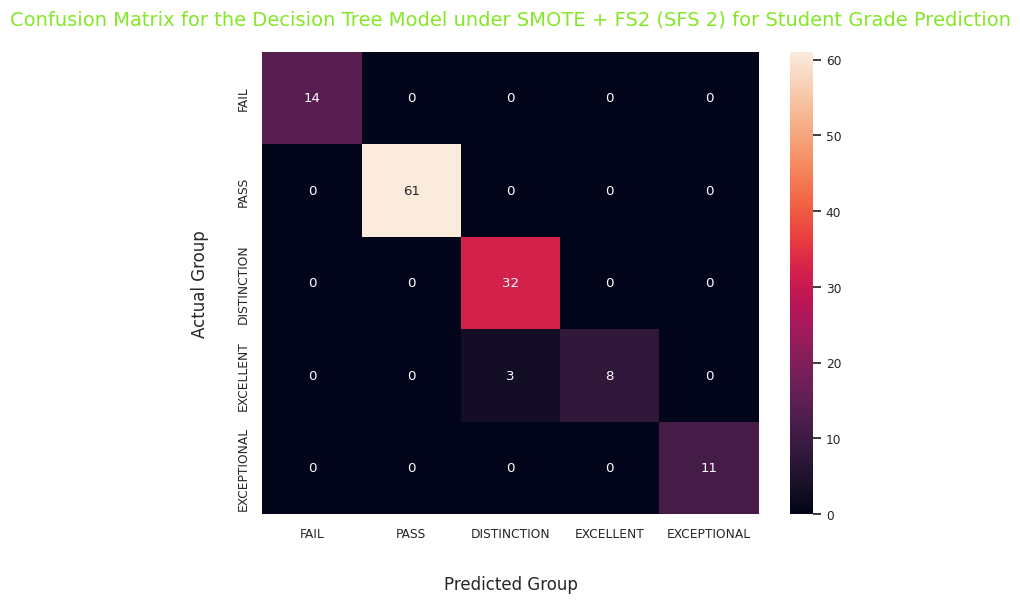

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_j48_fs2_sm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Decision Tree Model under SMOTE + FS2 (SFS 2) for Student Grade Prediction", color = '#84E727', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_j48_sfs2))

Accuracy Score :  0.9767441860465116


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_j48_sfs2,average='macro',labels=np.unique(y_pred_j48_sfs2)))

Precision Score :  0.9828571428571429


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_j48_sfs2,average='macro',labels=np.unique(y_pred_j48_sfs2)))

Recall Score :  0.9454545454545455


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_j48_sfs2,average='macro',labels=np.unique(y_pred_j48_sfs2)))

F1 Score :  0.959465828750982


##<font color = 'orange'>Naive - Bayes</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
naive_bayesian_model_sfs2 = MultinomialNB(class_prior=[3,4,2,1,5])
naive_bayesian_model_sfs2.fit(X_train_sfs2,y_train_sfs2)
y_pred_nb_sfs2 = naive_bayesian_model_sfs2.predict(X_test_fs2)

In [ ]:
y_pred_nb_sfs2

array([0, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 3, 1, 1, 4, 1, 4, 1, 2, 3, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1,
       2, 1, 0, 4, 1, 1, 1, 2, 2, 2, 2, 4, 1, 4, 1, 2, 2, 4, 2, 4, 1, 2,
       3, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 4, 2, 1, 1, 2, 1, 1, 2, 4, 1, 0, 4, 1,
       1, 2, 1, 3, 2, 2, 3, 3, 1, 1, 0, 2, 2, 1, 1, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_nb_sfs2 = confusion_matrix(y_test_fs2, y_pred_nb_sfs2)
print(cf_matrix_nb_sfs2)

[[11  3  0  0  0]
 [ 2 40 19  0  0]
 [ 0 10 18  4  0]
 [ 0  0  6  1  4]
 [ 0  0  2  1  8]]


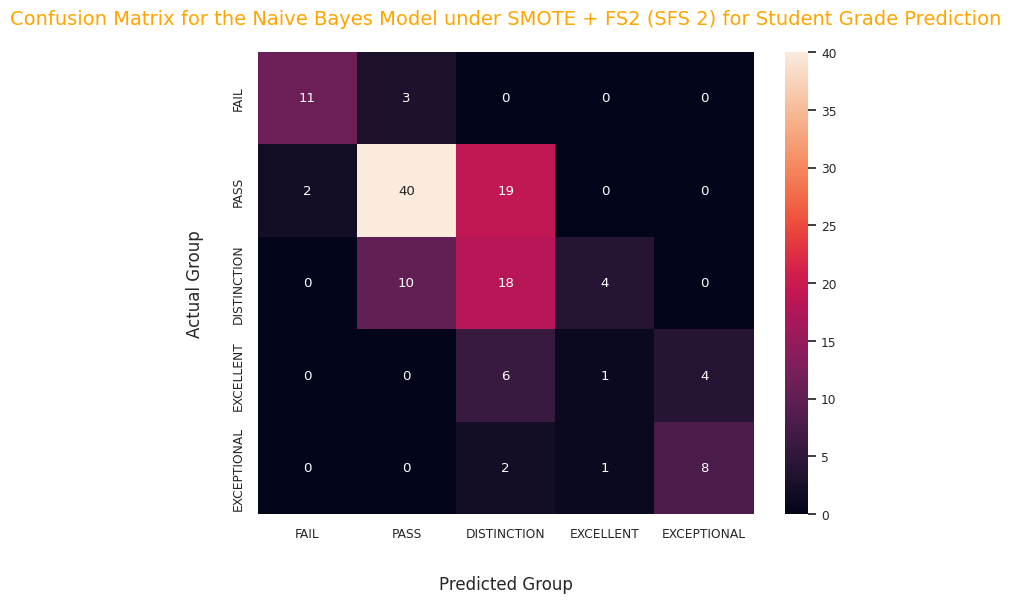

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_nb_sfs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Naive Bayes Model under SMOTE + FS2 (SFS 2) for Student Grade Prediction", color = 'Orange', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_nb_sfs2))

Accuracy Score :  0.6046511627906976


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_nb_sfs2,average='weighted',labels=np.unique(y_pred_nb_sfs2)))

Precision Score :  0.6189965609447838


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_nb_sfs2,average='weighted',labels=np.unique(y_pred_nb_sfs2)))

Recall Score :  0.6046511627906976


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_nb_sfs2,average='weighted',labels=np.unique(y_pred_nb_sfs2)))

F1 Score :  0.6055950036620801


##<font color = 'FB03FF'>k - Nearest Neighbours</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
knn_model_sfs2 = KNeighborsClassifier(n_neighbors = 2)
knn_model_sfs2.fit(X_train_sfs2,y_train_sfs2)
y_pred_knn_sfs2 = knn_model_sfs2.predict(X_test_fs2)

In [ ]:
y_pred_knn_sfs2

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 3, 4, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 2, 2, 3, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 4,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 4, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 4, 2,
       0, 1, 0, 3, 1, 1, 3, 3, 1, 1, 0, 1, 1, 0, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_knn_sfs2 = confusion_matrix(y_test_fs2, y_pred_knn_sfs2)
print(cf_matrix_knn_sfs2)

[[14  0  0  0  0]
 [ 8 50  3  0  0]
 [ 0  1 25  6  0]
 [ 0  0  2  9  0]
 [ 0  0  0  2  9]]


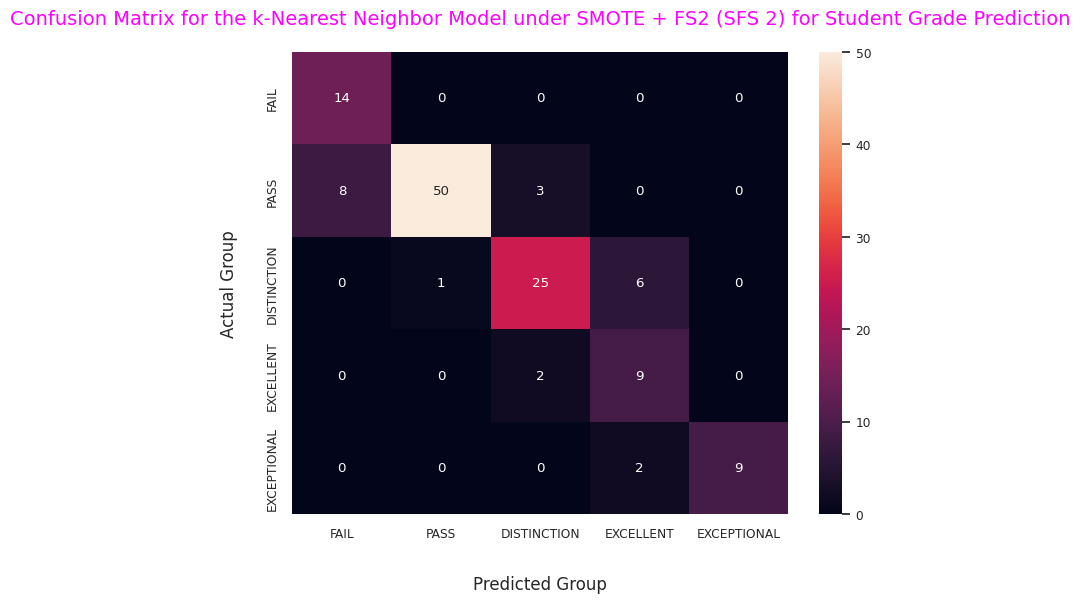

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_knn_sfs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the k-Nearest Neighbor Model under SMOTE + FS2 (SFS 2) for Student Grade Prediction", color = '#FB03FF', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_knn_sfs2))

Accuracy Score :  0.8294573643410853


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_knn_sfs2,average='weighted',labels=np.unique(y_pred_knn_sfs2)))

Precision Score :  0.8697923143887577


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_knn_sfs2, average='macro',labels=np.unique(y_pred_knn_sfs2)))

Recall Score :  0.8474571535022355


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_knn_sfs2, average='weighted', labels=np.unique(y_pred_knn_sfs2)))

F1 Score :  0.8382252309109023


##<font color = 'aqua'>Logistic Regression </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model_sfs2 = LogisticRegression(solver='liblinear')
logistic_model_sfs2.fit(X_train_sfs2, y_train_sfs2)
y_pred_lr_sfs2 = logistic_model_sfs2.predict(X_test_fs2)

In [ ]:
y_pred_lr_sfs2

array([0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 3, 2, 4, 1, 3, 4, 1, 1,
       1, 1, 1, 2, 2, 3, 1, 3, 0, 2, 1, 3, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 4, 4, 3, 2, 2, 3, 4, 1, 1, 2, 4, 2, 4, 1, 3,
       3, 1, 3, 3, 2, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 4,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 4, 2, 3, 1, 2, 1, 1, 1, 2, 1, 0, 4, 3,
       1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_lr_fs2_sm = confusion_matrix(y_test_fs2, y_pred_lr_sfs2)
print(cf_matrix_lr_fs2_sm)

[[14  0  0  0  0]
 [ 0 56  5  0  0]
 [ 0  2 15 15  0]
 [ 0  0  5  6  0]
 [ 0  0  0  0 11]]


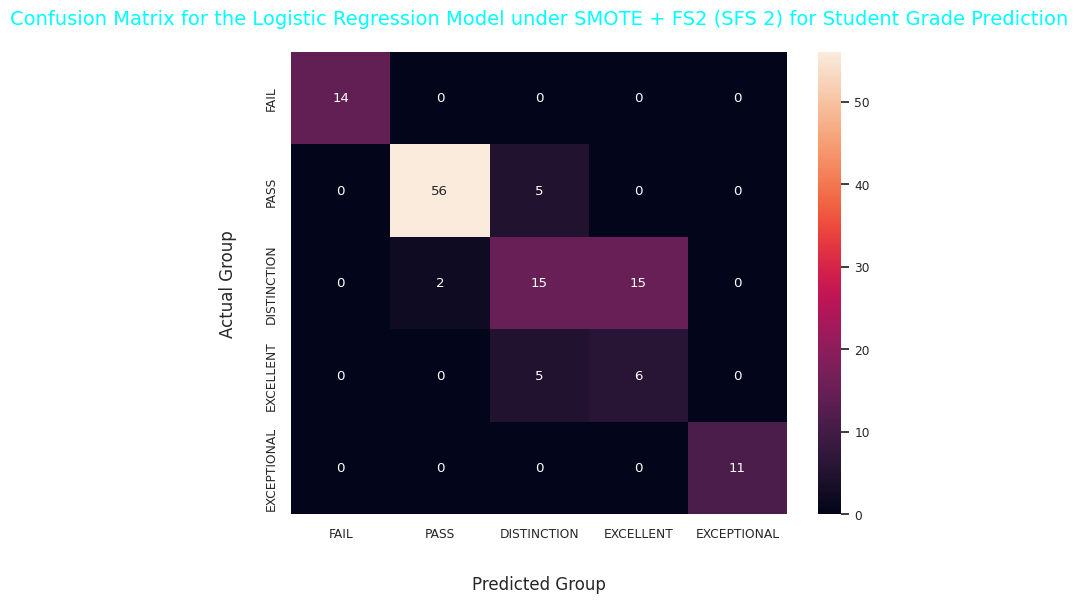

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_lr_fs2_sm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Logistic Regression Model under SMOTE + FS2 (SFS 2) for Student Grade Prediction", color = 'aqua', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_lr_sfs2))

Accuracy Score :  0.7906976744186046


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_lr_sfs2,average='weighted',labels=np.unique(y_pred_lr_sfs2)))

Precision Score :  0.8235613090464735


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_lr_sfs2,average='macro',labels=np.unique(y_pred_lr_sfs2)))

Recall Score :  0.7864474664679583


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_lr_sfs2,average='weighted',labels=np.unique(y_pred_lr_sfs2)))

F1 Score :  0.8013865889072886


##<font color = 'Olive'> Support Vector Machines </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
svm_model_sfs2 = svm.SVC(kernel = 'poly', degree = 22, class_weight = 'balanced', random_state = 30) #C = 0.3, kernel = 'poly', class_weight='balanced', degree = 2, random_state = 10
svm_model_sfs2.fit(X_train_sfs2,y_train_sfs2)
y_pred_svm_sfs2 = svm_model_sfs2.predict(X_test_fs2)

In [ ]:
y_pred_svm_sfs2

array([0, 0, 1, 2, 3, 1, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 3, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 1, 0, 1, 2, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 1, 0, 4, 2,
       1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 0, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_svm_sfs2 = confusion_matrix(y_test_fs2, y_pred_svm_sfs2)
print(cf_matrix_svm_sfs2)

[[14  0  0  0  0]
 [ 1 58  2  0  0]
 [ 0  0 27  5  0]
 [ 0  0  0 10  1]
 [ 0  0  0  0 11]]


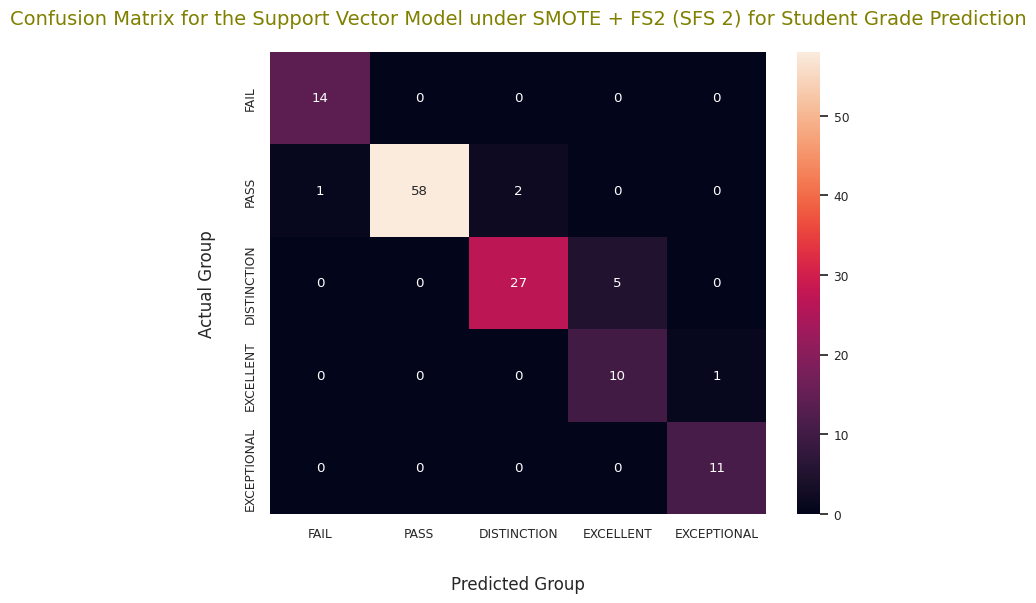

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_svm_sfs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Support Vector Model under SMOTE + FS2 (SFS 2) for Student Grade Prediction", color = 'Olive', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs2, y_pred_svm_sfs2))

Accuracy Score :  0.9302325581395349


In [ ]:
print("Precision Score : ", precision_score(y_test_fs2, y_pred_svm_sfs2,average='weighted',labels=np.unique(y_pred_svm_sfs2)))

Precision Score :  0.9401274169116991


In [ ]:
print("Recall Score : ", recall_score(y_test_fs2, y_pred_svm_sfs2,average='micro',labels=np.unique(y_pred_svm_sfs2)))

Recall Score :  0.9302325581395349


In [ ]:
print("F1 Score : ", f1_score(y_test_fs2, y_pred_svm_sfs2,average='weighted',labels=np.unique(y_pred_svm_sfs2)))

F1 Score :  0.9324850596720325


# <font color='DodgerBlue'> SMOTE </font> + <font color = "6D11E2"> InfoGainAttributeEval - (SFS -3) </font>

##Splitting the data for implementing SMOTE

In [ ]:
y_train_fs3.value_counts()

1    574
2    285
0    130
4     85
3     79
Name: Group, dtype: int64

In [ ]:
X_train_fs3.shape,y_train_fs3.shape

((1153, 5), (1153,))

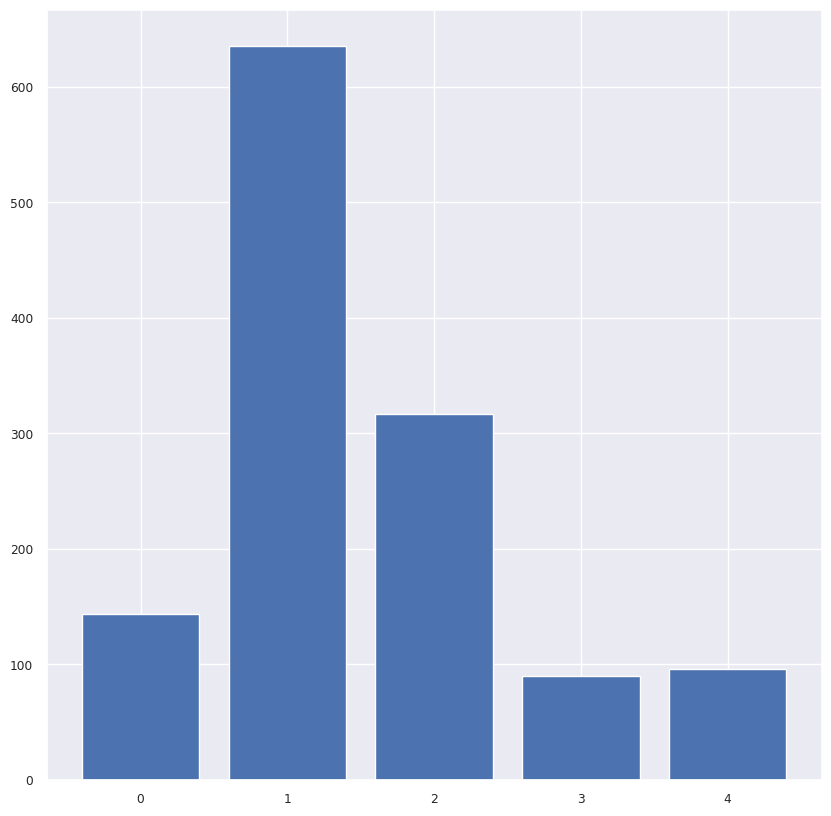

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_fs3)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#We have to split the SMOTE sampling into 1:1:2:2:2 ratio
#The values of the Oversampling strategy would become
#{0: 71, 1: 71, 2: 142, 3: 142, 4:142}

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 16)
X_train_fs3_sm, y_train_fs3_sm = sm.fit_resample(X_train_fs3, y_train_fs3.ravel())
X_train_fs3_sm.shape, y_train_fs3_sm.shape

((2870, 5), (2870,))

In [ ]:
len(y_train_fs3_sm[y_train_fs3_sm==0]),len(y_train_fs3_sm[y_train_fs3_sm==1]),len(y_train_fs3_sm[y_train_fs3_sm==2]),len(y_train_fs3_sm[y_train_fs3_sm==3]),len(y_train_fs3_sm[y_train_fs3_sm==4])

(574, 574, 574, 574, 574)

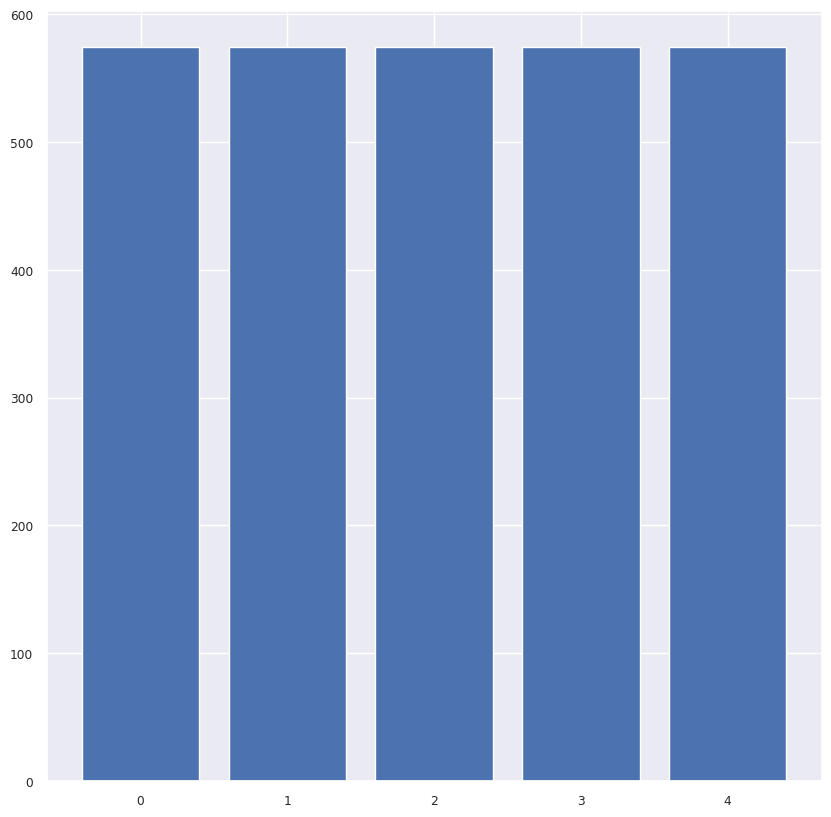

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train_fs3_sm)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from collections import Counter
print("Before SMOTE : ", Counter(y_train_fs3))
print("After SMOTE : ", Counter(y_train_fs3_sm))

Before SMOTE :  Counter({1: 574, 2: 285, 0: 130, 4: 85, 3: 79})
After SMOTE :  Counter({1: 574, 2: 574, 0: 574, 3: 574, 4: 574})


In [ ]:
strategy = {0:600, 1:600, 2:1200, 3:1200, 4:1200}
smote = SMOTE(sampling_strategy=strategy)
X_train_sfs3, y_train_sfs3 = smote.fit_resample(X_train_fs3, y_train_fs3.ravel())
X_train_sfs3.shape, y_train_sfs3.shape

((4800, 5), (4800,))

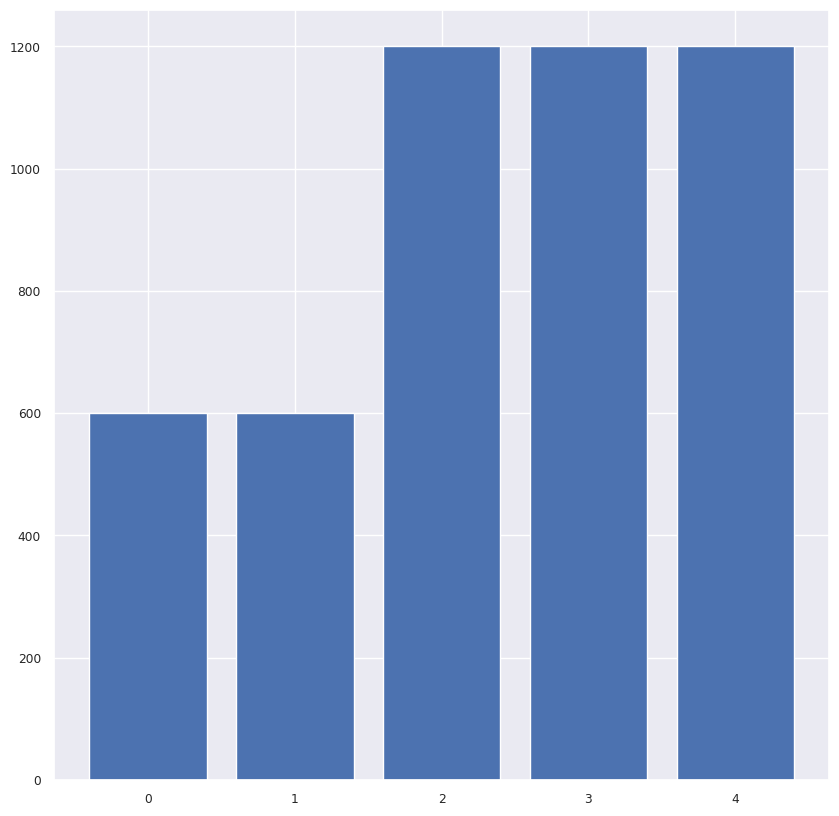

In [ ]:
counter = Counter(y_train_sfs3)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## <font color = '84E727'> Decision Trees </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
Decision_tree_sfs3 = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced',splitter = 'random', random_state = 1, min_weight_fraction_leaf= 0.1)
Decision_tree_sfs3.fit(X_train_sfs3, y_train_sfs3)
y_pred_j48_sfs3 = Decision_tree_sfs3.predict(X_test_fs3)

In [ ]:
y_pred_j48_sfs3

array([0, 0, 1, 2, 3, 1, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_j48_fs3_sm = confusion_matrix(y_test_fs3, y_pred_j48_sfs3)
print(cf_matrix_j48_fs3_sm)

[[14  0  0  0  0]
 [ 0 53  8  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


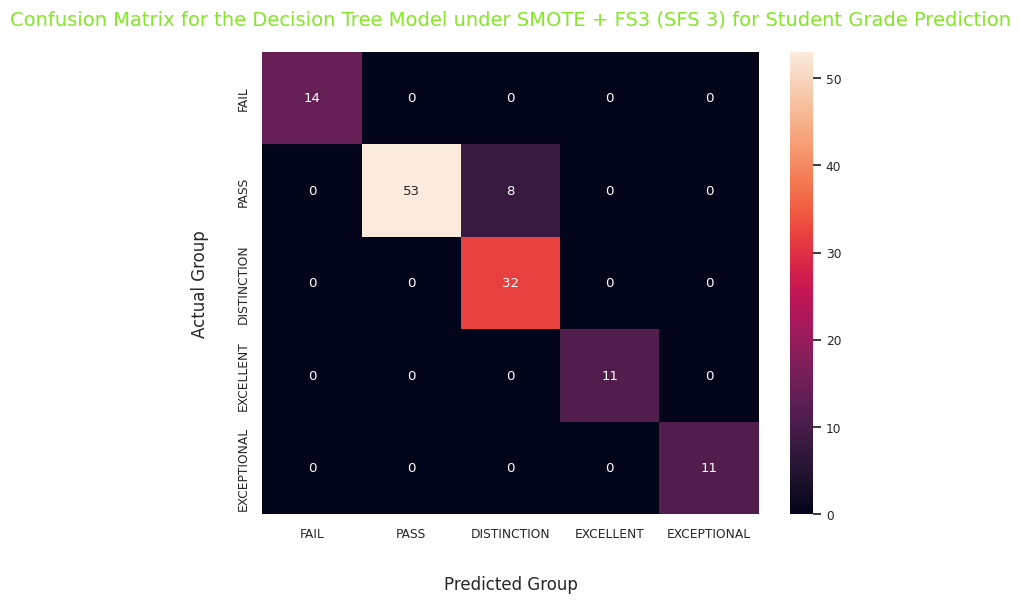

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_j48_fs3_sm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Decision Tree Model under SMOTE + FS3 (SFS 3) for Student Grade Prediction", color = '#84E727', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_j48_sfs3))

Accuracy Score :  0.937984496124031


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_j48_sfs3,average='macro',labels=np.unique(y_pred_j48_sfs3)))

Precision Score :  0.96


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_j48_sfs3,average='macro',labels=np.unique(y_pred_j48_sfs3)))

Recall Score :  0.9737704918032787


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_j48_sfs3,average='macro',labels=np.unique(y_pred_j48_sfs3)))

F1 Score :  0.9637426900584796


##<font color = 'orange'>Naive - Bayes</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
naive_bayesian_model_sfs3 = MultinomialNB(class_prior=[3,4,2,1,5])
naive_bayesian_model_sfs3.fit(X_train_sfs3,y_train_sfs3)
y_pred_nb_sfs3= naive_bayesian_model_sfs3.predict(X_test_fs3)

In [ ]:
y_pred_nb_sfs3

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_nb_sfs3 = confusion_matrix(y_test_fs3, y_pred_nb_sfs3)
print(cf_matrix_nb_sfs3)

[[14  0  0  0  0]
 [ 0 57  4  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


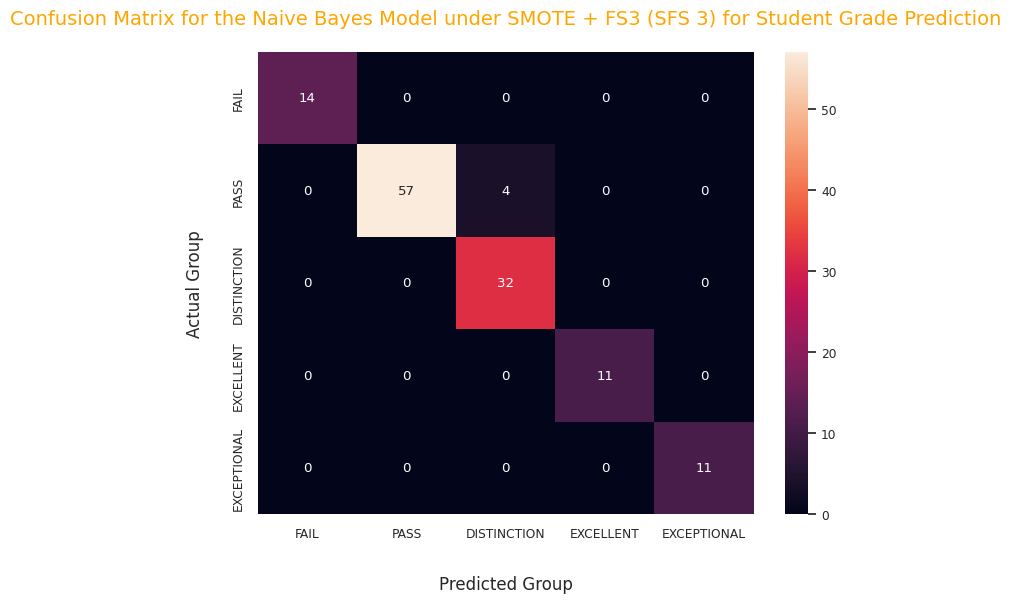

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_nb_sfs3, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Naive Bayes Model under SMOTE + FS3 (SFS 3) for Student Grade Prediction", color = 'Orange', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_nb_sfs3))

Accuracy Score :  0.9689922480620154


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_nb_sfs3,average='weighted',labels=np.unique(y_pred_nb_sfs3)))

Precision Score :  0.9724375538329026


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_nb_sfs3,average='weighted',labels=np.unique(y_pred_nb_sfs3)))

Recall Score :  0.9689922480620154


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_nb_sfs3,average='weighted',labels=np.unique(y_pred_nb_sfs3)))

F1 Score :  0.969378685648481


##<font color = 'FB03FF'>k - Nearest Neighbours</font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
knn_model_sfs3 = KNeighborsClassifier(n_neighbors = 75)
knn_model_sfs3.fit(X_train_sfs3,y_train_sfs3)
y_pred_knn_sfs3 = knn_model_sfs3.predict(X_test_fs3)

In [ ]:
y_pred_knn_sfs3

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 0, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_knn_sfs3 = confusion_matrix(y_test_fs3, y_pred_knn_sfs3)
print(cf_matrix_knn_sfs3)

[[14  0  0  0  0]
 [ 1 58  2  0  0]
 [ 0  0 31  1  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


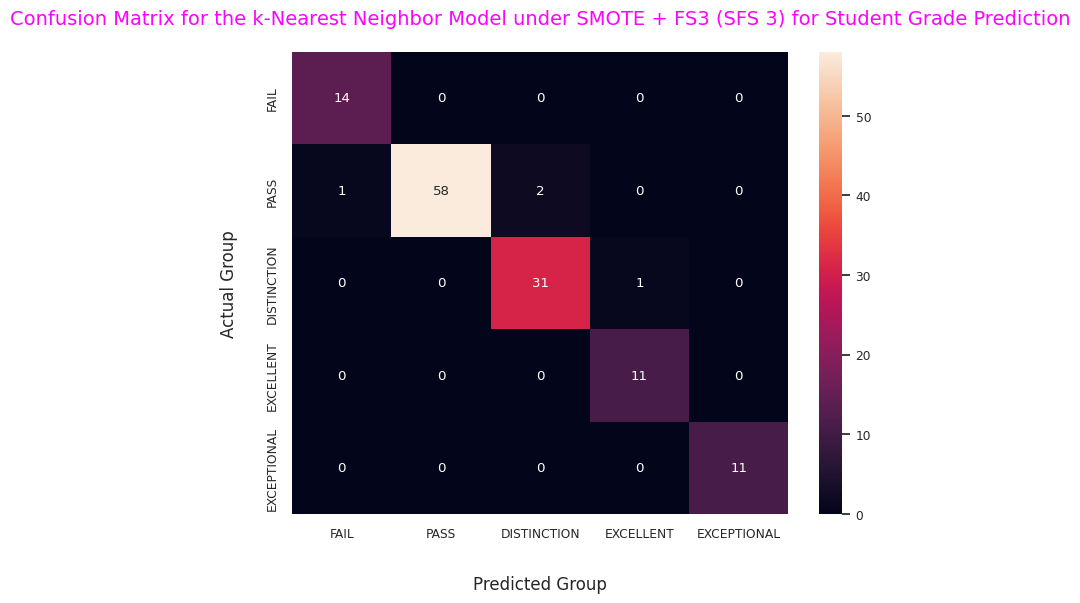

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_knn_sfs3, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the k-Nearest Neighbor Model under SMOTE + FS3 (SFS 3) for Student Grade Prediction", color = '#FB03FF', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_knn_sfs3))

Accuracy Score :  0.9689922480620154


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_knn_sfs3,average='weighted',labels=np.unique(y_pred_knn_sfs3)))

Precision Score :  0.9706248531829926


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_knn_sfs3, average='macro',labels=np.unique(y_pred_knn_sfs3)))

Recall Score :  0.9839139344262294


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_knn_sfs3, average='weighted', labels=np.unique(y_pred_knn_sfs3)))

F1 Score :  0.9691801729207103


##<font color = 'aqua'>Logistic Regression </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
logistic_model_sfs3 = LogisticRegression(solver='liblinear')
logistic_model_sfs3.fit(X_train_sfs3, y_train_sfs3)
y_pred_lr_sfs3 = logistic_model_sfs3.predict(X_test_fs3)

In [ ]:
y_pred_lr_sfs3

array([0, 0, 1, 2, 3, 1, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       2, 1, 3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_lr_fs3_sm = confusion_matrix(y_test_fs3, y_pred_lr_sfs3)
print(cf_matrix_lr_fs3_sm)

[[14  0  0  0  0]
 [ 0 53  8  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


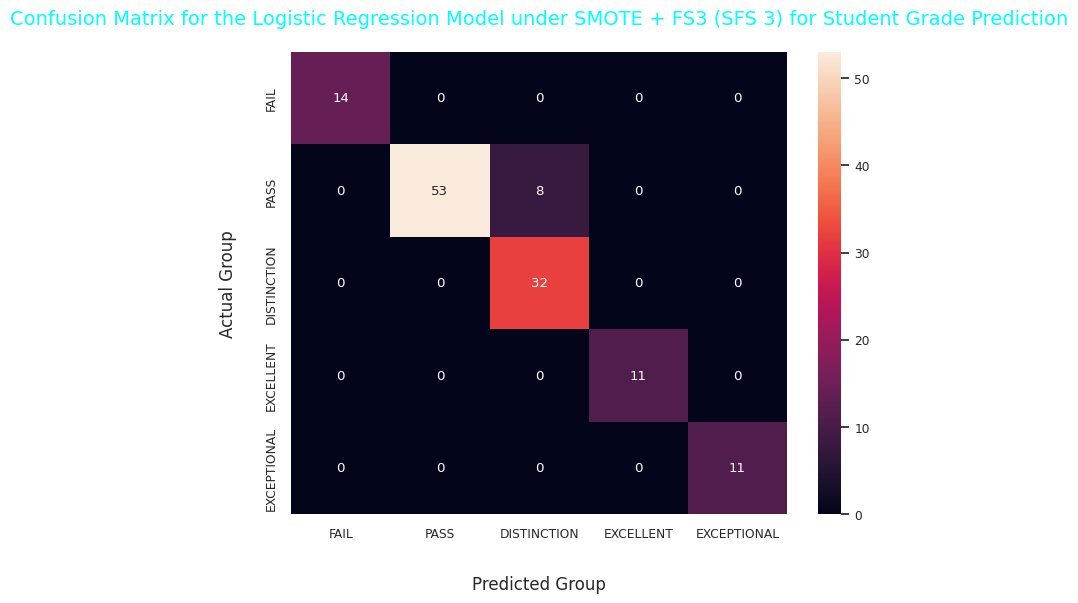

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_lr_fs3_sm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Logistic Regression Model under SMOTE + FS3 (SFS 3) for Student Grade Prediction", color = 'aqua', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_lr_sfs3))

Accuracy Score :  0.937984496124031


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_lr_sfs3,average='weighted',labels=np.unique(y_pred_lr_sfs3)))

Precision Score :  0.9503875968992248


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_lr_sfs3,average='macro',labels=np.unique(y_pred_lr_sfs3)))

Recall Score :  0.9737704918032787


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_lr_sfs3,average='weighted',labels=np.unique(y_pred_lr_sfs3)))

F1 Score :  0.9392538193027788


##<font color = 'Olive'> Support Vector Machines </font>

###<font color = '3C9CBB'> Fitting Model </font>

In [ ]:
svm_model_sfs3 = svm.SVC(kernel = 'poly', degree = 22, class_weight = 'balanced', random_state = 30) #C = 0.3, kernel = 'poly', class_weight='balanced', degree = 2, random_state = 10
svm_model_sfs3.fit(X_train_sfs3,y_train_sfs3)
y_pred_svm_sfs3 = svm_model_sfs3.predict(X_test_fs3)

In [ ]:
y_pred_svm_sfs3

array([0, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 4, 1, 2, 4, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 3, 1, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 3, 4, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 4, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 4, 2,
       1, 1, 0, 3, 1, 1, 2, 3, 1, 1, 0, 1, 1, 1, 2, 2, 2, 4, 1])

###<font color = '3C9CBB'>Confusion_Matrix</font>

In [ ]:
cf_matrix_svm_sfs2 = confusion_matrix(y_test_fs2, y_pred_svm_sfs2)
print(cf_matrix_svm_sfs2)

[[14  0  0  0  0]
 [ 1 58  2  0  0]
 [ 0  0 27  5  0]
 [ 0  0  0 10  1]
 [ 0  0  0  0 11]]


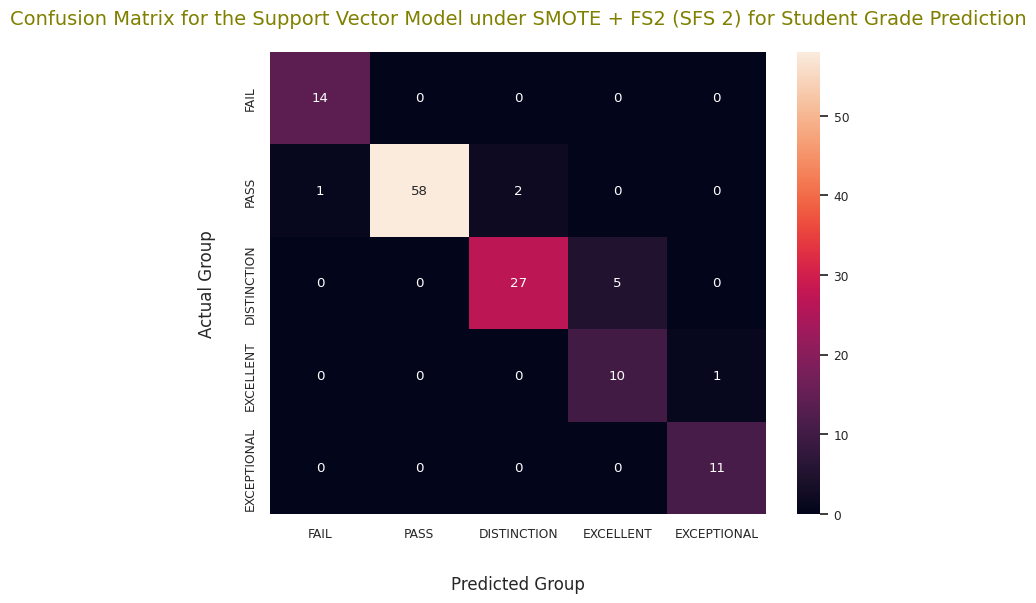

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 0.8)

ax = sns.heatmap(cf_matrix_svm_sfs2, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Group", fontsize=12, labelpad=25)
ax.xaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set y-axis label and ticks
ax.set_ylabel("Actual Group", fontsize=12, labelpad=20)
ax.yaxis.set_ticklabels(['FAIL', 'PASS','DISTINCTION','EXCELLENT','EXCEPTIONAL'])

# set plot title
ax.set_title("Confusion Matrix for the Support Vector Model under SMOTE + FS2 (SFS 2) for Student Grade Prediction", color = 'Olive', fontsize=14, pad=20)

plt.show()

###<font color = '3C9CBB'>Classification Report</font>

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_fs3, y_pred_svm_sfs3))

Accuracy Score :  0.9224806201550387


In [ ]:
print("Precision Score : ", precision_score(y_test_fs3, y_pred_svm_sfs3,average='weighted',labels=np.unique(y_pred_svm_sfs3)))

Precision Score :  0.9341031336265438


In [ ]:
print("Recall Score : ", recall_score(y_test_fs3, y_pred_svm_sfs3, average='micro',labels=np.unique(y_pred_svm_sfs3)))

Recall Score :  0.9224806201550387


In [ ]:
print("F1 Score : ", f1_score(y_test_fs3, y_pred_svm_sfs3,average='weighted',labels=np.unique(y_pred_svm_sfs3)))

F1 Score :  0.9243575630129165
